In [1]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%run retained-helpers.ipynb

In [2]:
%config InlineBackend.figure_format='retina'
plt.rc("figure", figsize=(6, 4), dpi=100)
sns.set(style="white", palette=None, rc={"axes.linewidth": 1})

In [3]:
def heteroscedastic_base(x, base_std, bias=0):
    """A heteroscedastic function that serves as the basis for
    the true function and a hypothetical posterior predictive.
    
    Args:
        x: a 1D array of predictor values
        base_std: a scalar used for computing the standard deviation of Y
        bias: a scalar term introducing bias to the mean prediction
    """
    std = np.abs(x) * base_std
    std = np.where(std < 0.5, 0.5, std)
    return scipy.stats.norm(loc=(0.1 + bias) * x ** 3, scale=std)

# Original plots for classification using Accuracy and AUC

<img src='./images/gals-retained-metric.png'>

# Similar plots for regression based e.g. on RMSE

## Case 1: The role of aleatoric uncertainty and bias

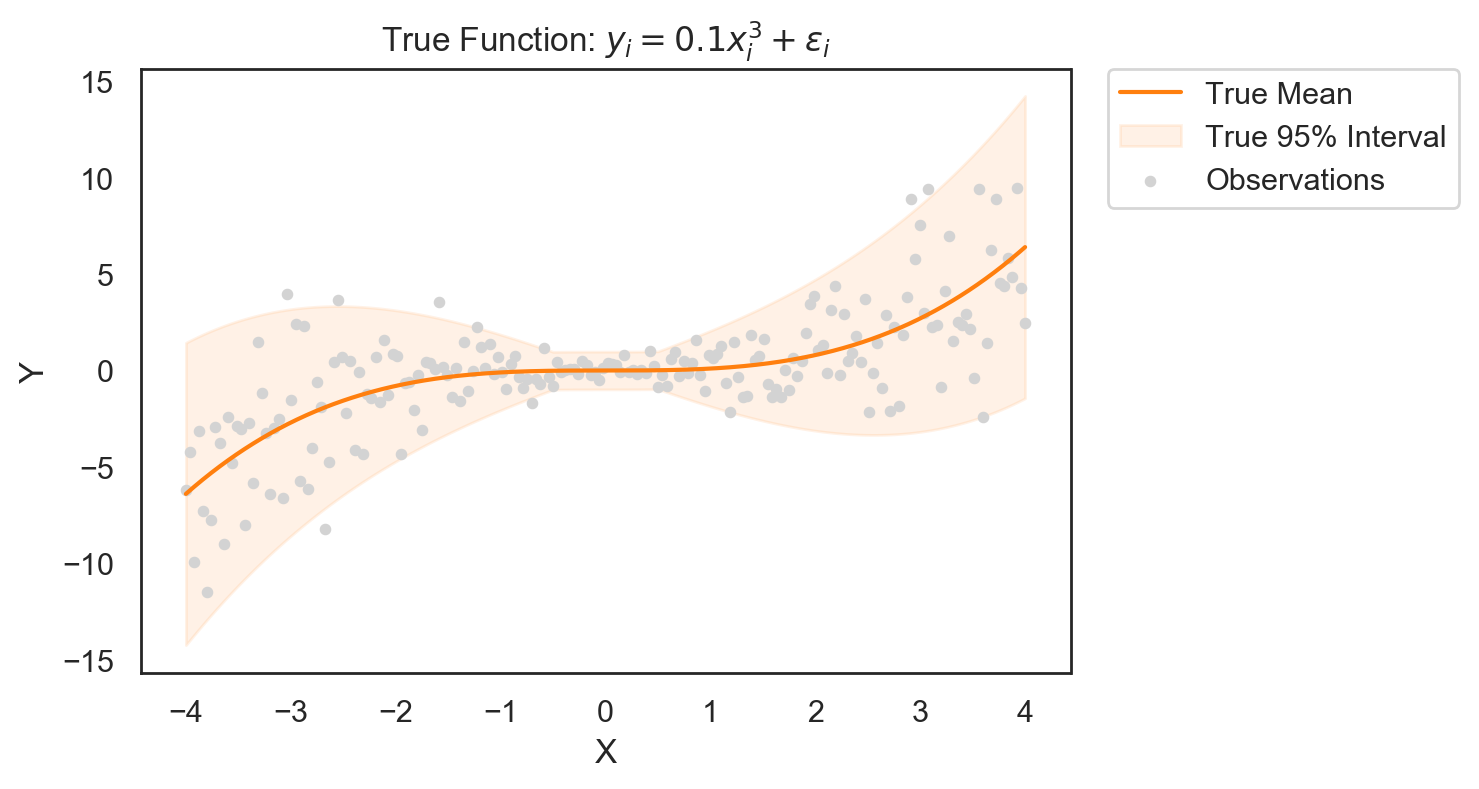

In [4]:
# Define the true function and generate observations
heteroscedastic = lambda x: heteroscedastic_base(x, base_std=1.0)

data_points = [
    {"n_points": 200, "xlim": [-4, 4]},
]
df = generate_data(heteroscedastic, points=data_points, seed=4)

# Plot the data
plot_true_function(heteroscedastic, df, title=fr"True Function: $y_i = 0.1x_i^3 + \varepsilon_i$")

### RMSE: Interval-Based Deferals

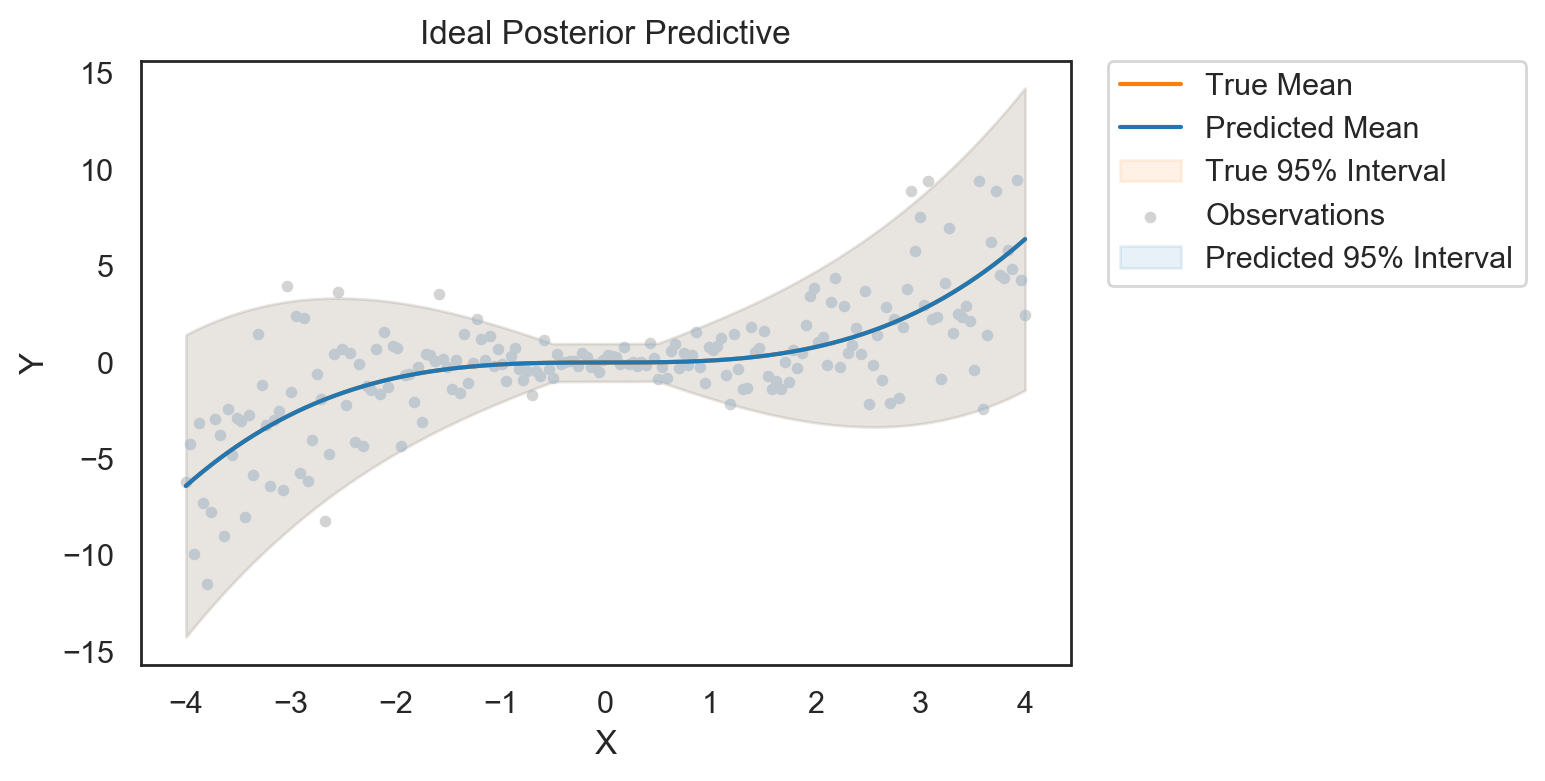

In [5]:
ppc = {}

model = "ideal"
ppc[model] = lambda x: heteroscedastic_base(x, base_std=1.0)
plot_true_function(heteroscedastic, df, legend=False)
plot_posterior_predictive(ppc[model], df, title=f"{model.title()} Posterior Predictive")

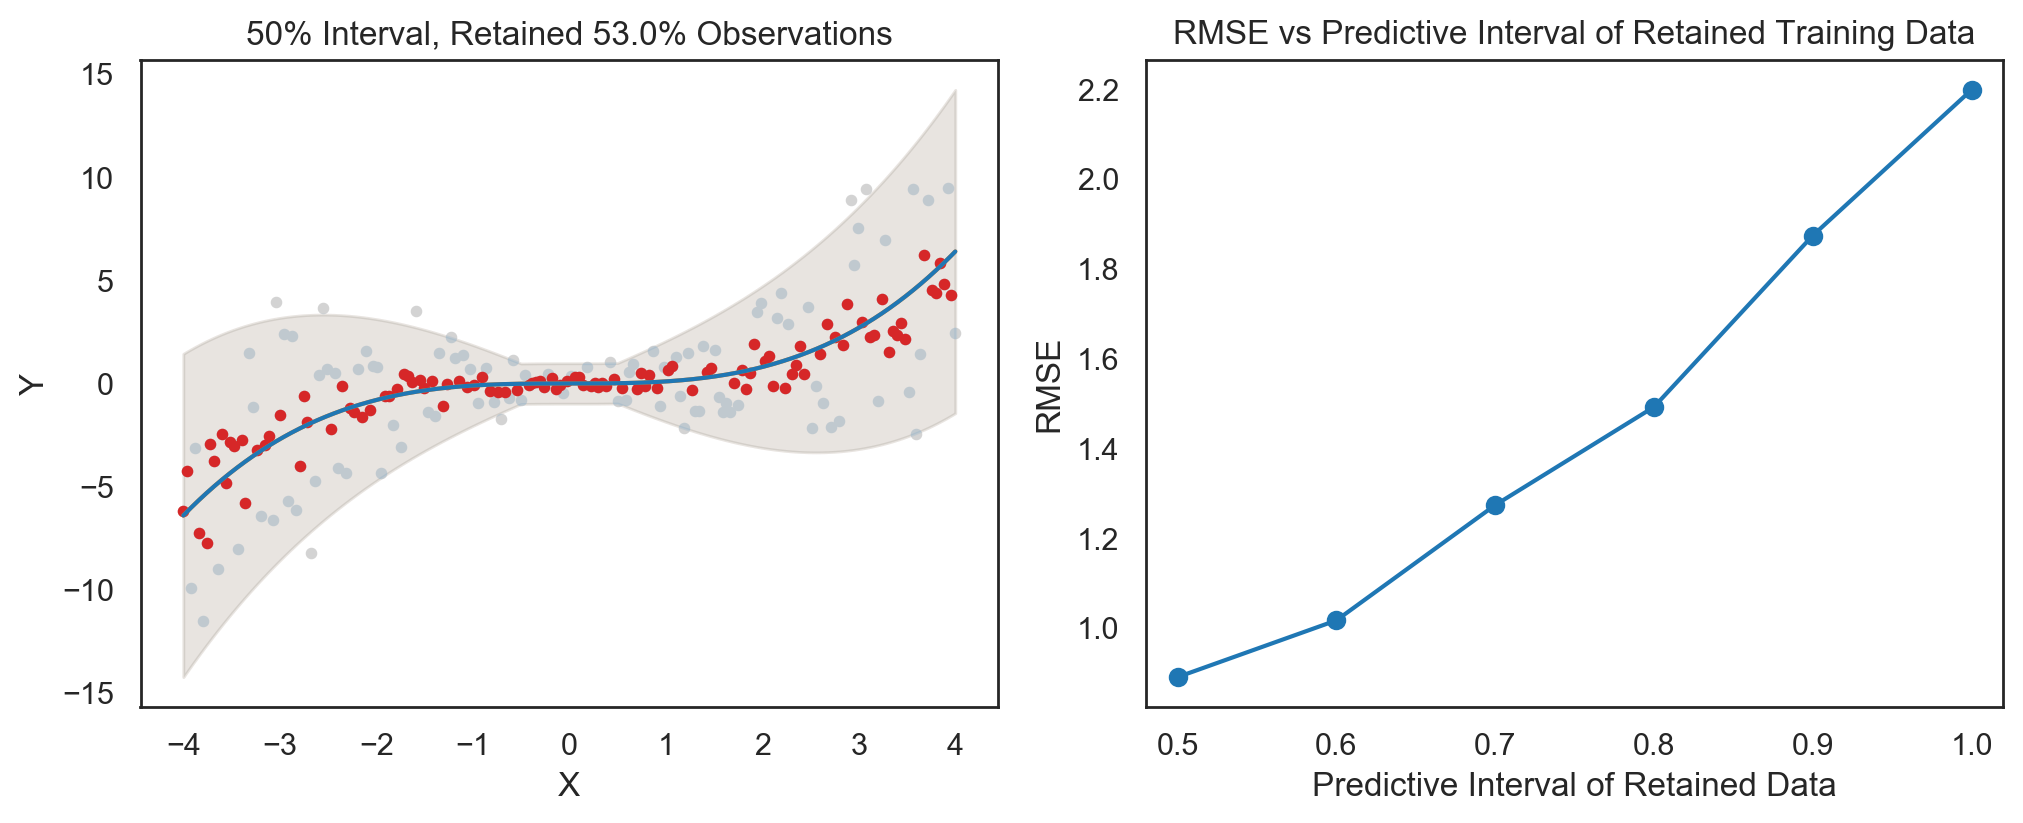

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_interval(ppc[model], df, interval=0.5)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"50% Interval, Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

plot_rmse_interval(ppc_func=ppc[model], df=df, label=model, legend=False, ax=ax[1])

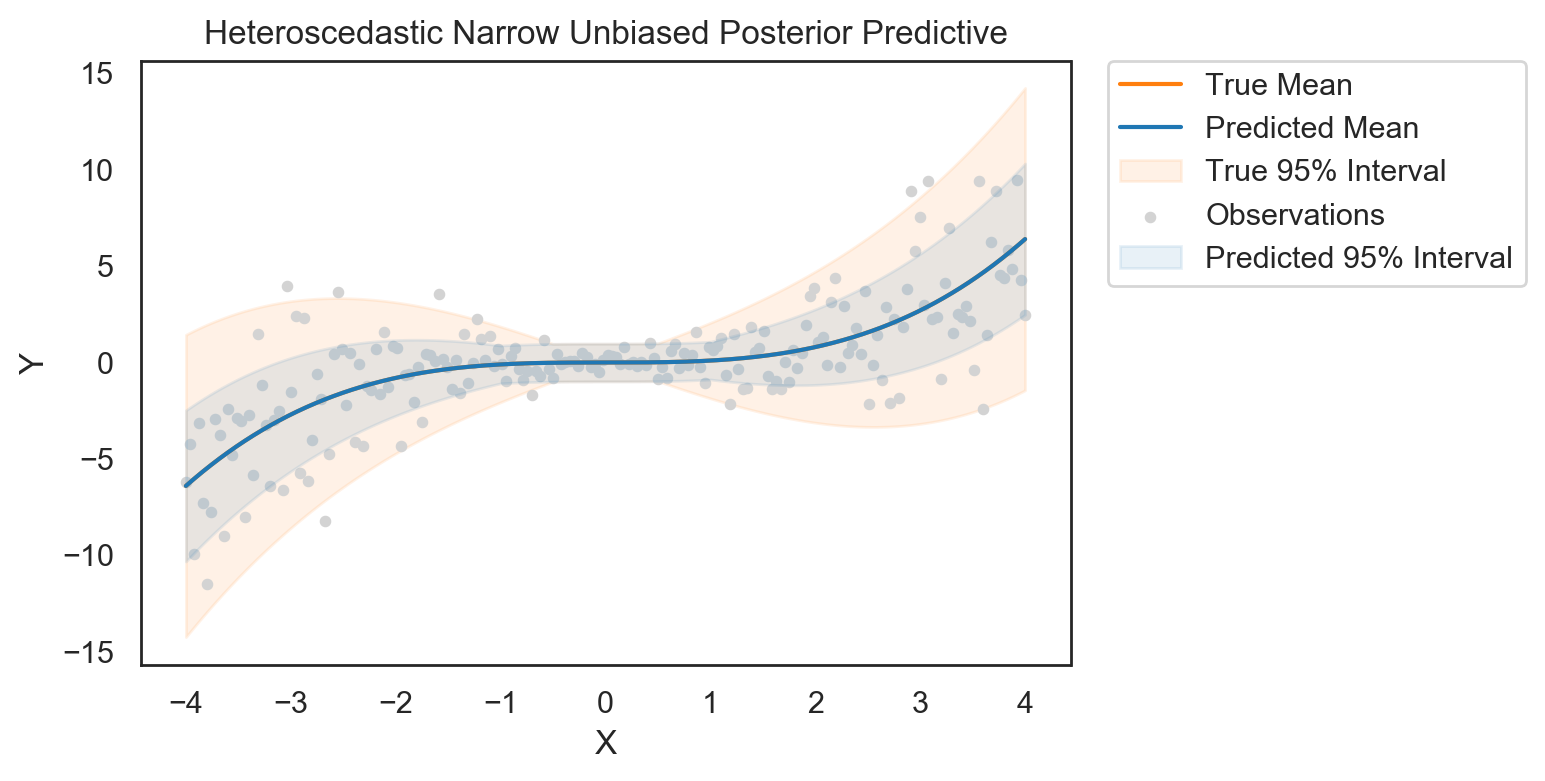

In [7]:
model = "heteroscedastic narrow unbiased"
ppc[model] = lambda x: heteroscedastic_base(x, base_std=0.5)
plot_true_function(heteroscedastic, df, legend=False)
plot_posterior_predictive(ppc[model], df, title=f"{model.title()} Posterior Predictive")

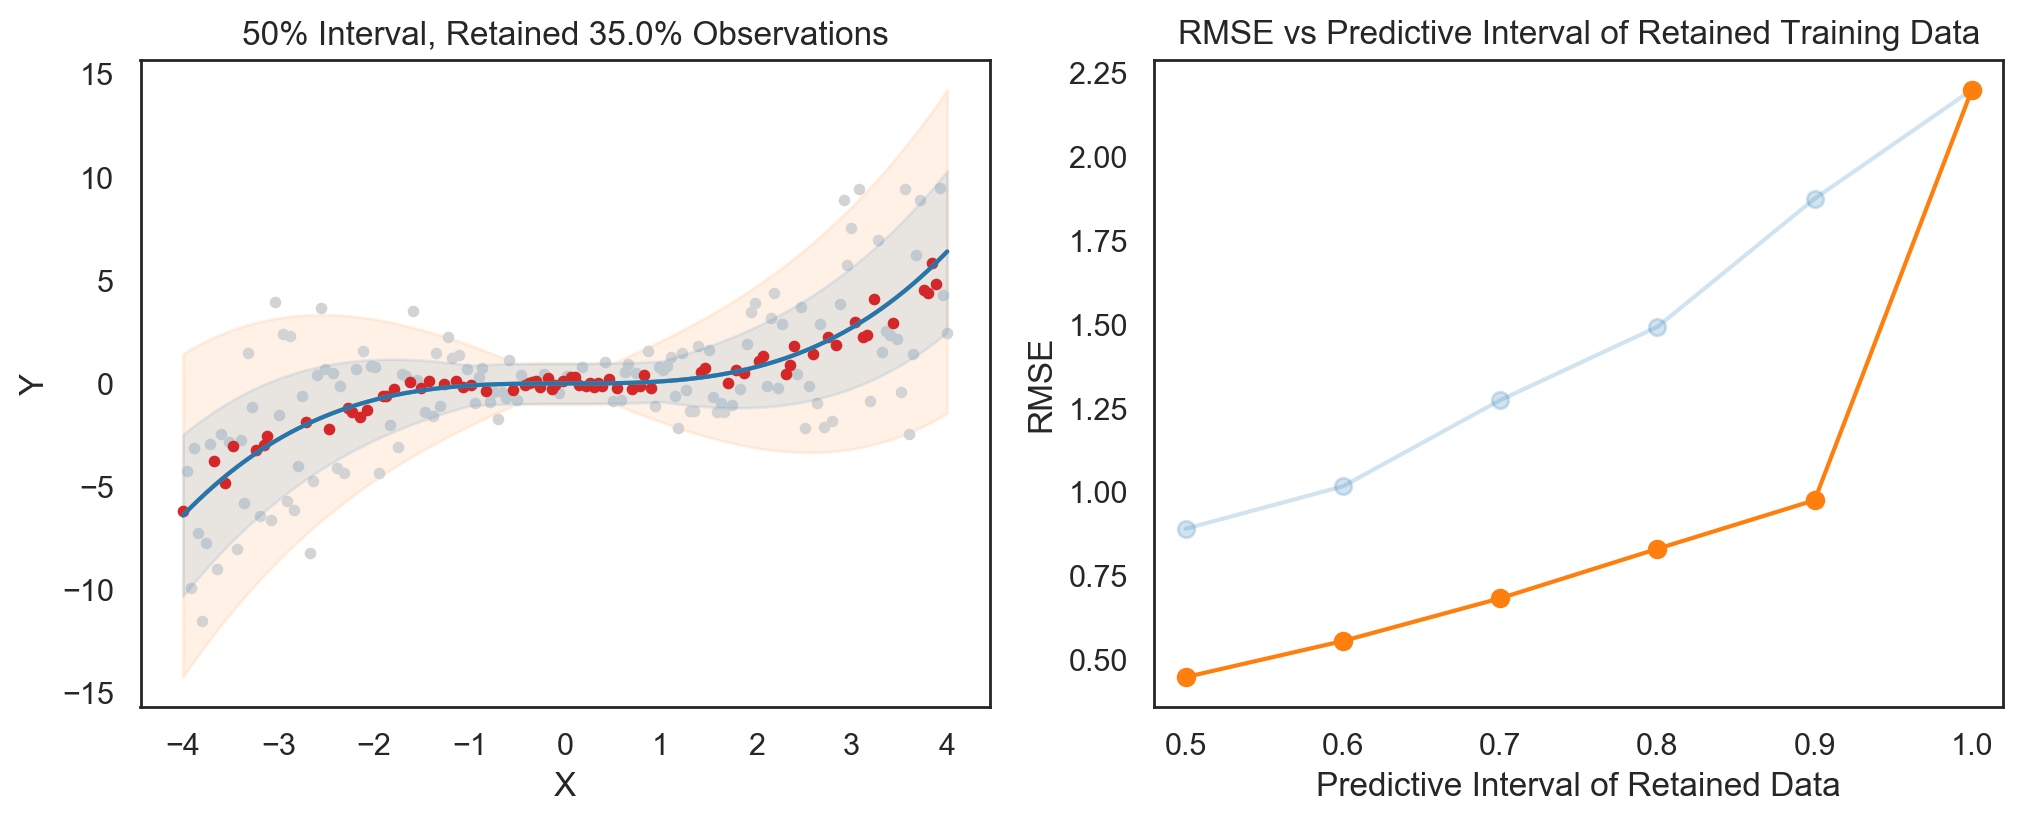

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_interval(ppc[model], df, interval=0.5)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"50% Interval, Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

for name, func in ppc.items():
    alpha = 1 if name == model else 0.2
    plot_rmse_interval(ppc_func=func, df=df, label=name, legend=False, ax=ax[1], alpha=alpha)

### RMSE: Fraction of Observations

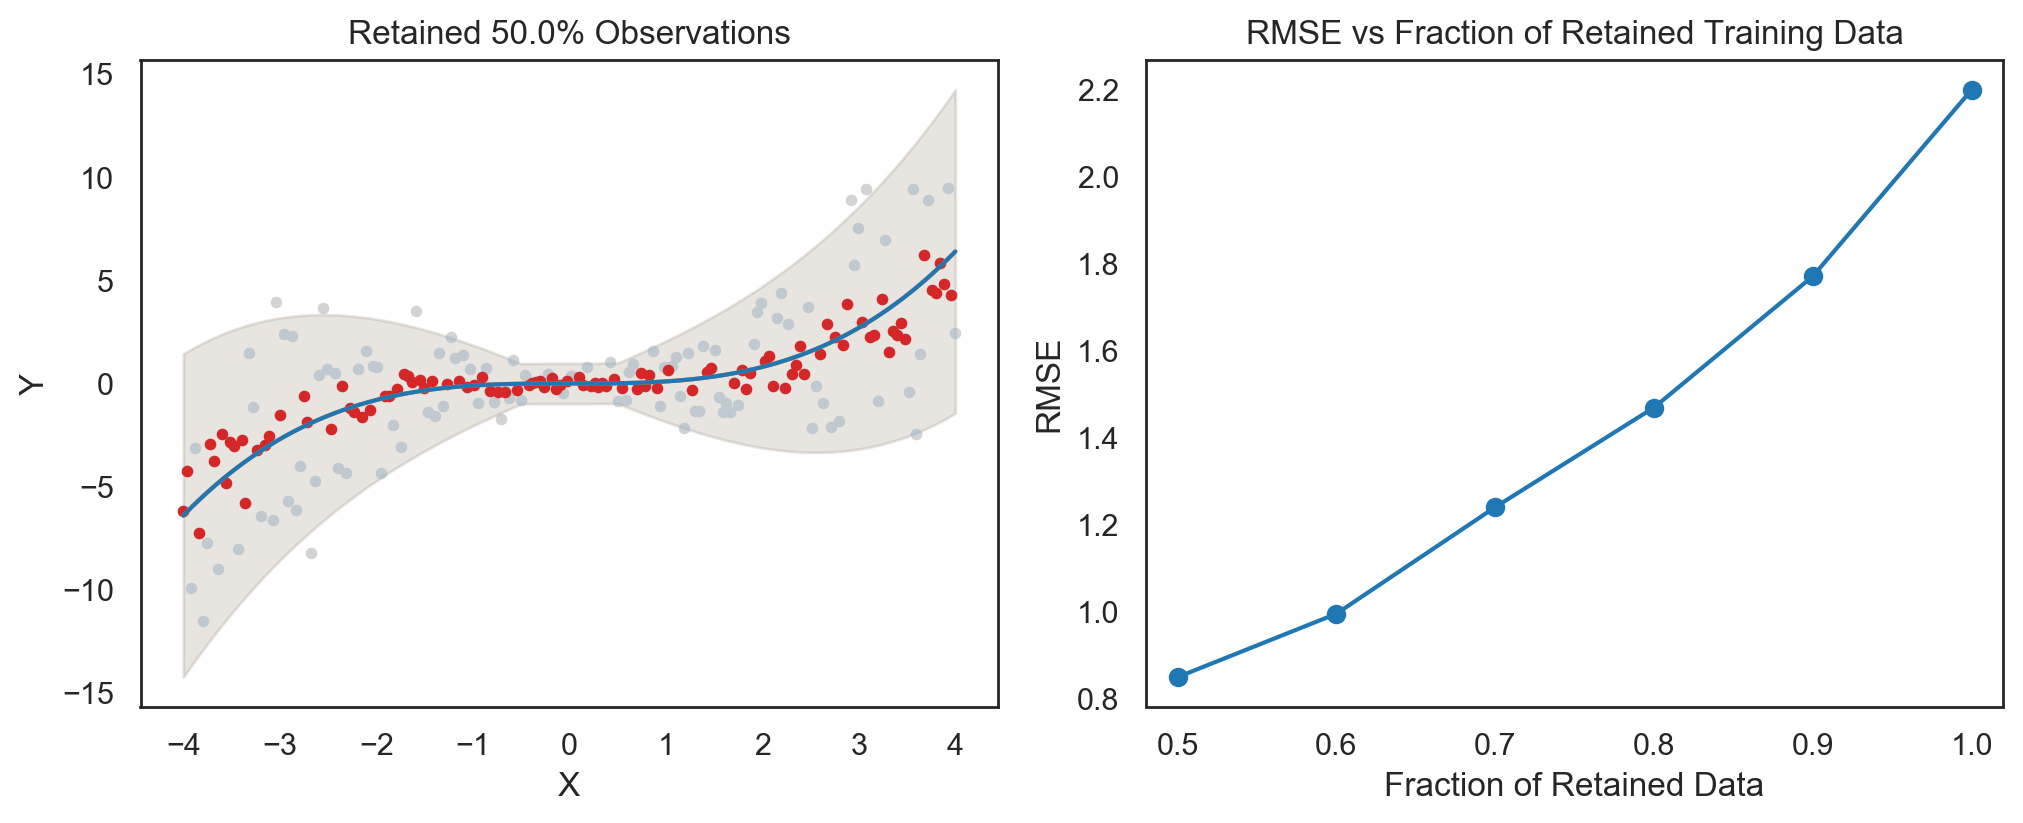

In [9]:
model = "ideal"
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_frac(ppc[model], df, frac=0.5, seed=0)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

plot_rmse_frac(ppc_func=ppc[model], df=df, label=model, legend=False, ax=ax[1])

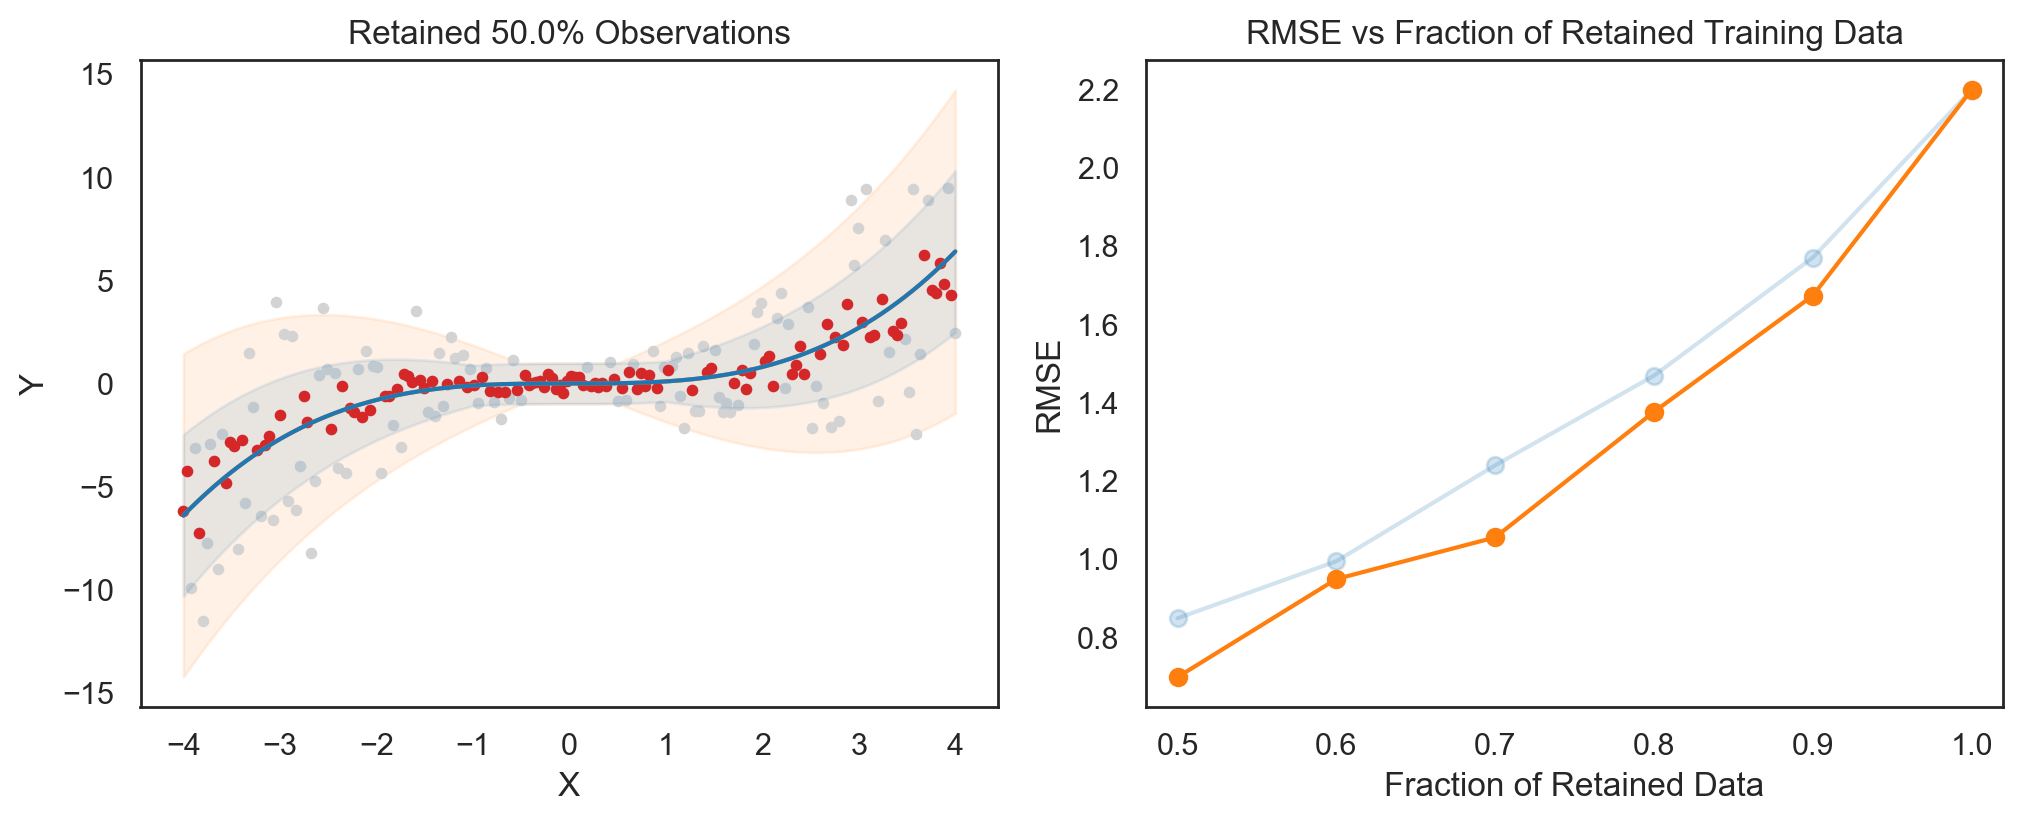

In [10]:
model = "heteroscedastic narrow unbiased"
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_frac(ppc[model], df, frac=0.5, seed=0)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

for name, func in ppc.items():
    alpha = 1 if name == model else 0.2
    plot_rmse_frac(ppc_func=func, df=df, label=name, legend=False, ax=ax[1], alpha=alpha)

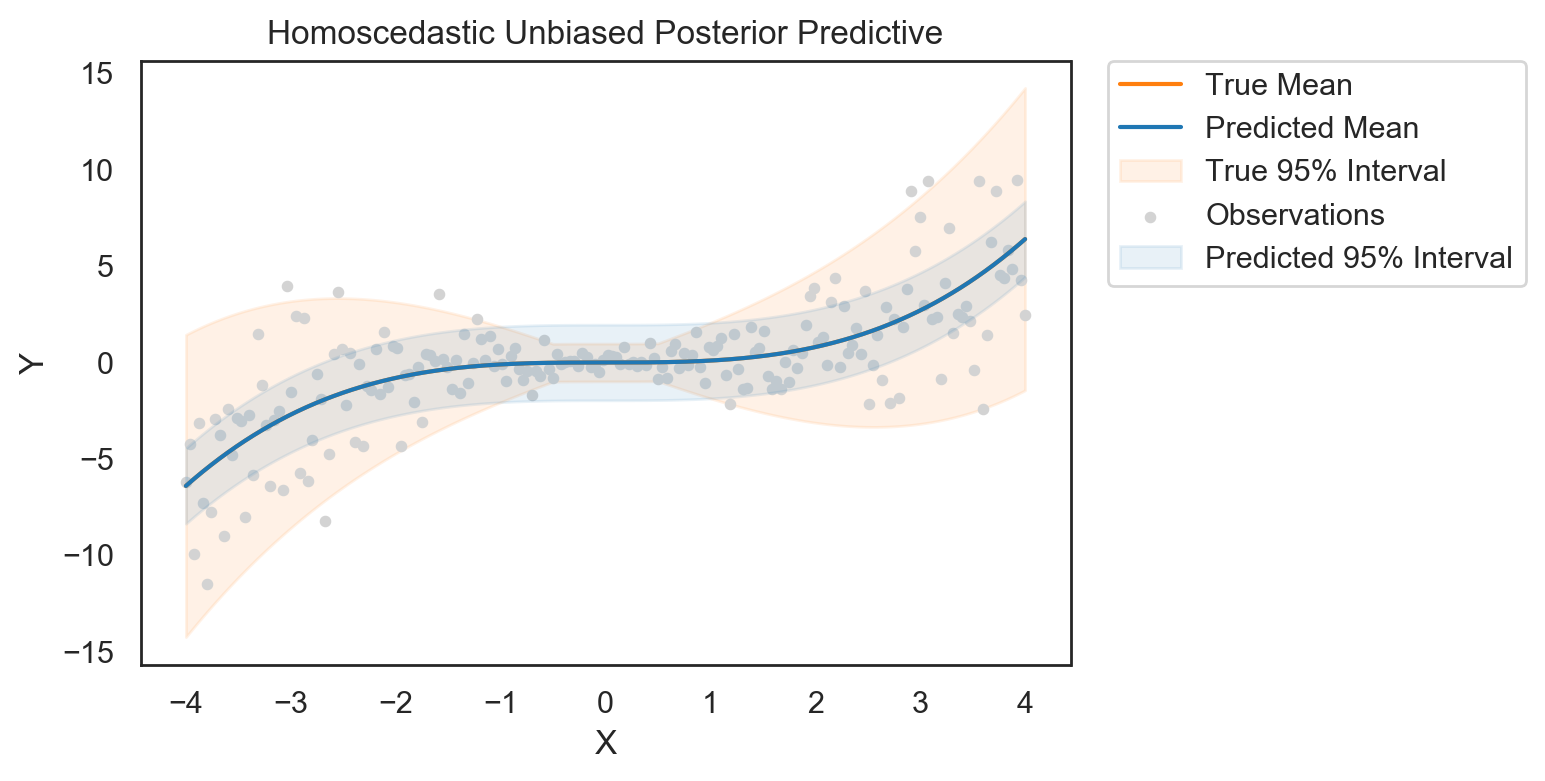

In [11]:
model = "homoscedastic unbiased"
ppc[model] = lambda x: scipy.stats.norm(loc=0.10 * x ** 3, scale=1)
plot_true_function(heteroscedastic, df, legend=False)
plot_posterior_predictive(ppc[model], df, title=f"{model.title()} Posterior Predictive")

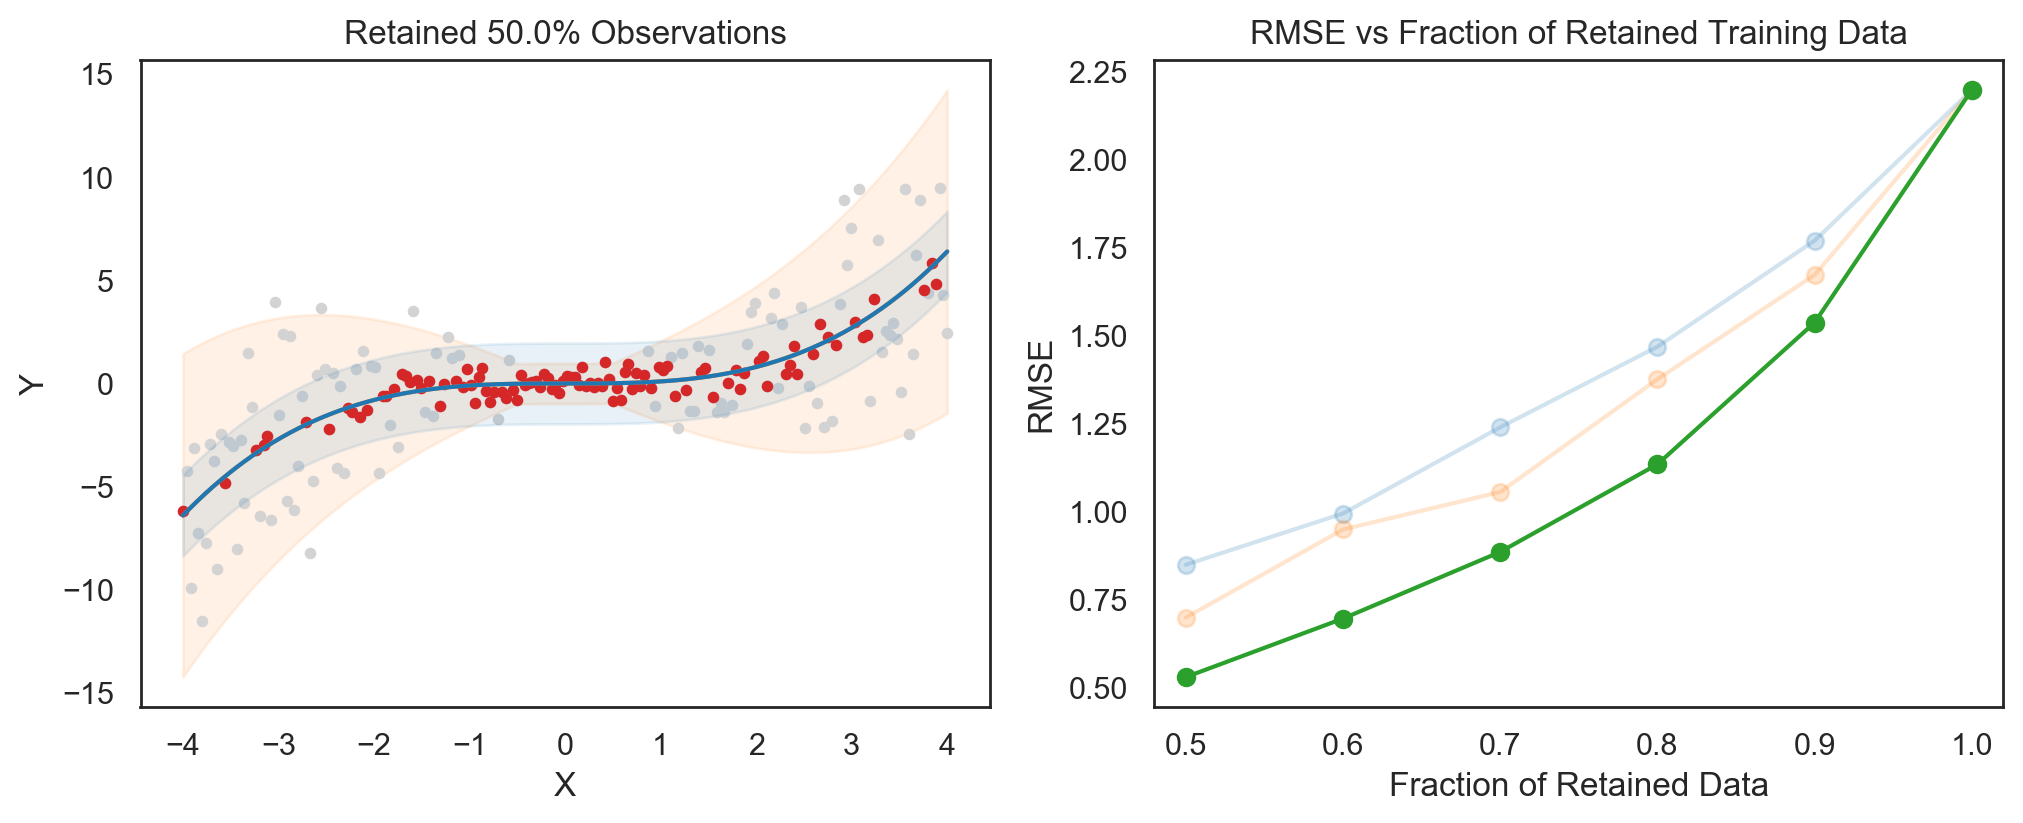

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_frac(ppc[model], df, frac=0.5, seed=0)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

for name, func in ppc.items():
    alpha = 1 if name == model else 0.2
    plot_rmse_frac(ppc_func=func, df=df, label=name, legend=False, ax=ax[1], alpha=alpha)

### Negative Log-Likelihood

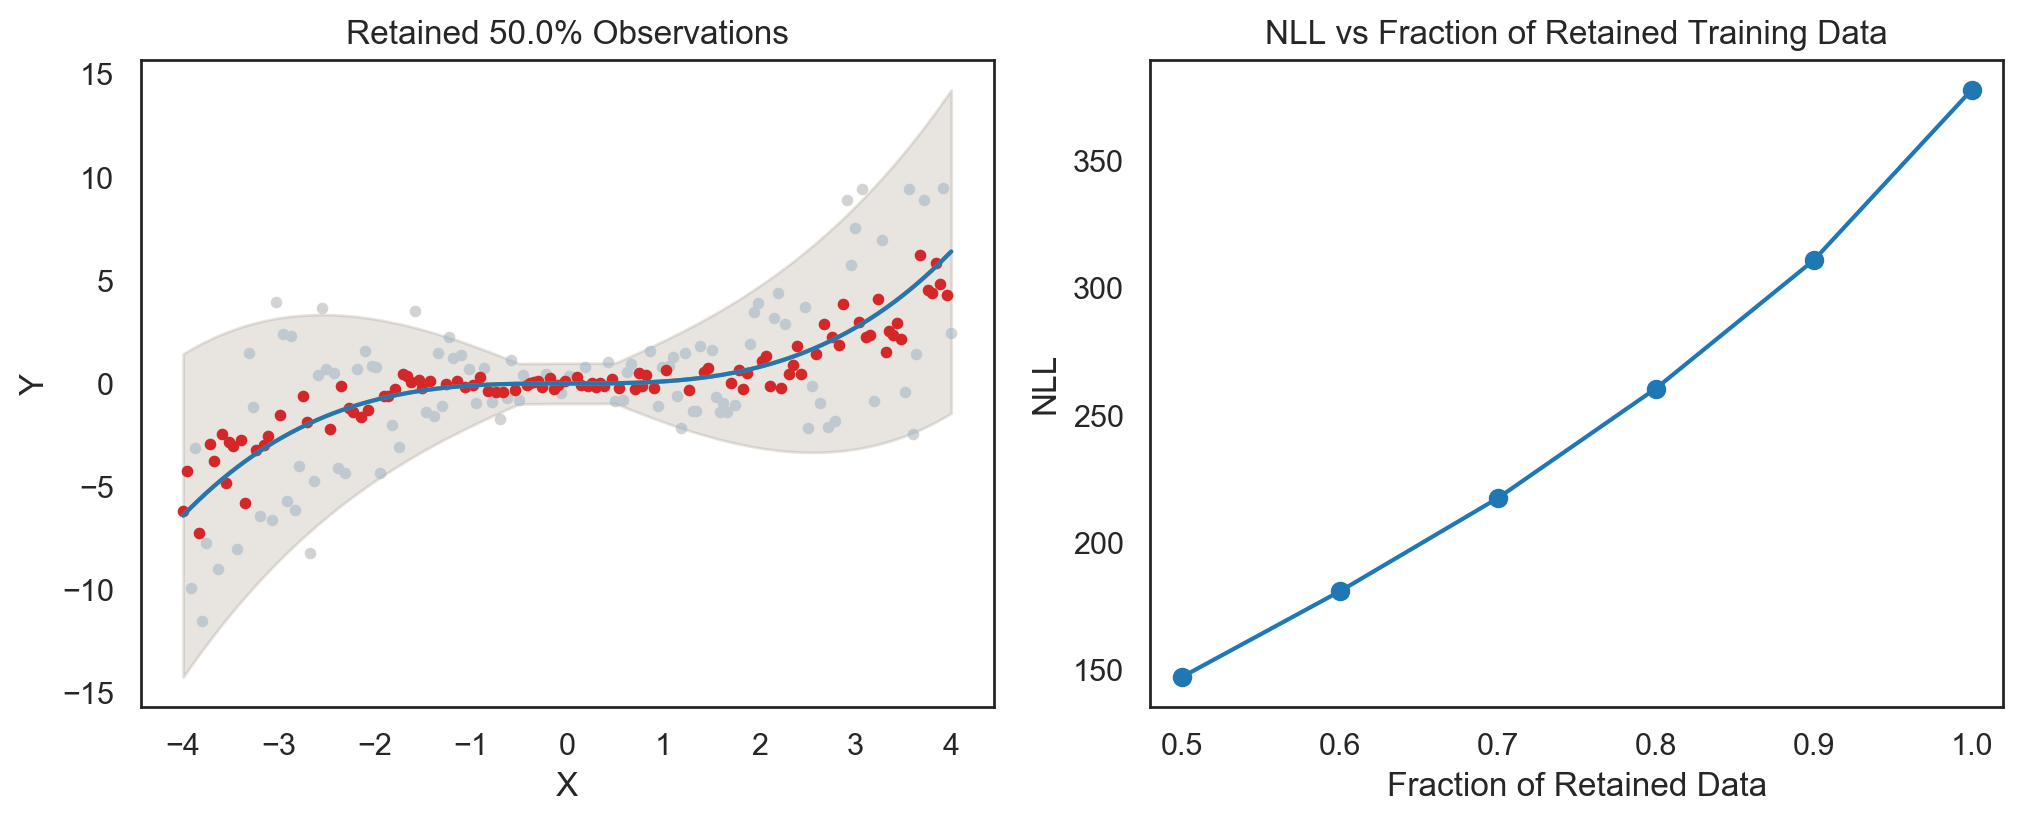

In [13]:
model = "ideal"
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_frac(ppc[model], df, frac=0.5, seed=0)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

plot_nll_frac(ppc_func=ppc[model], df=df, label=model, legend=False, ax=ax[1])

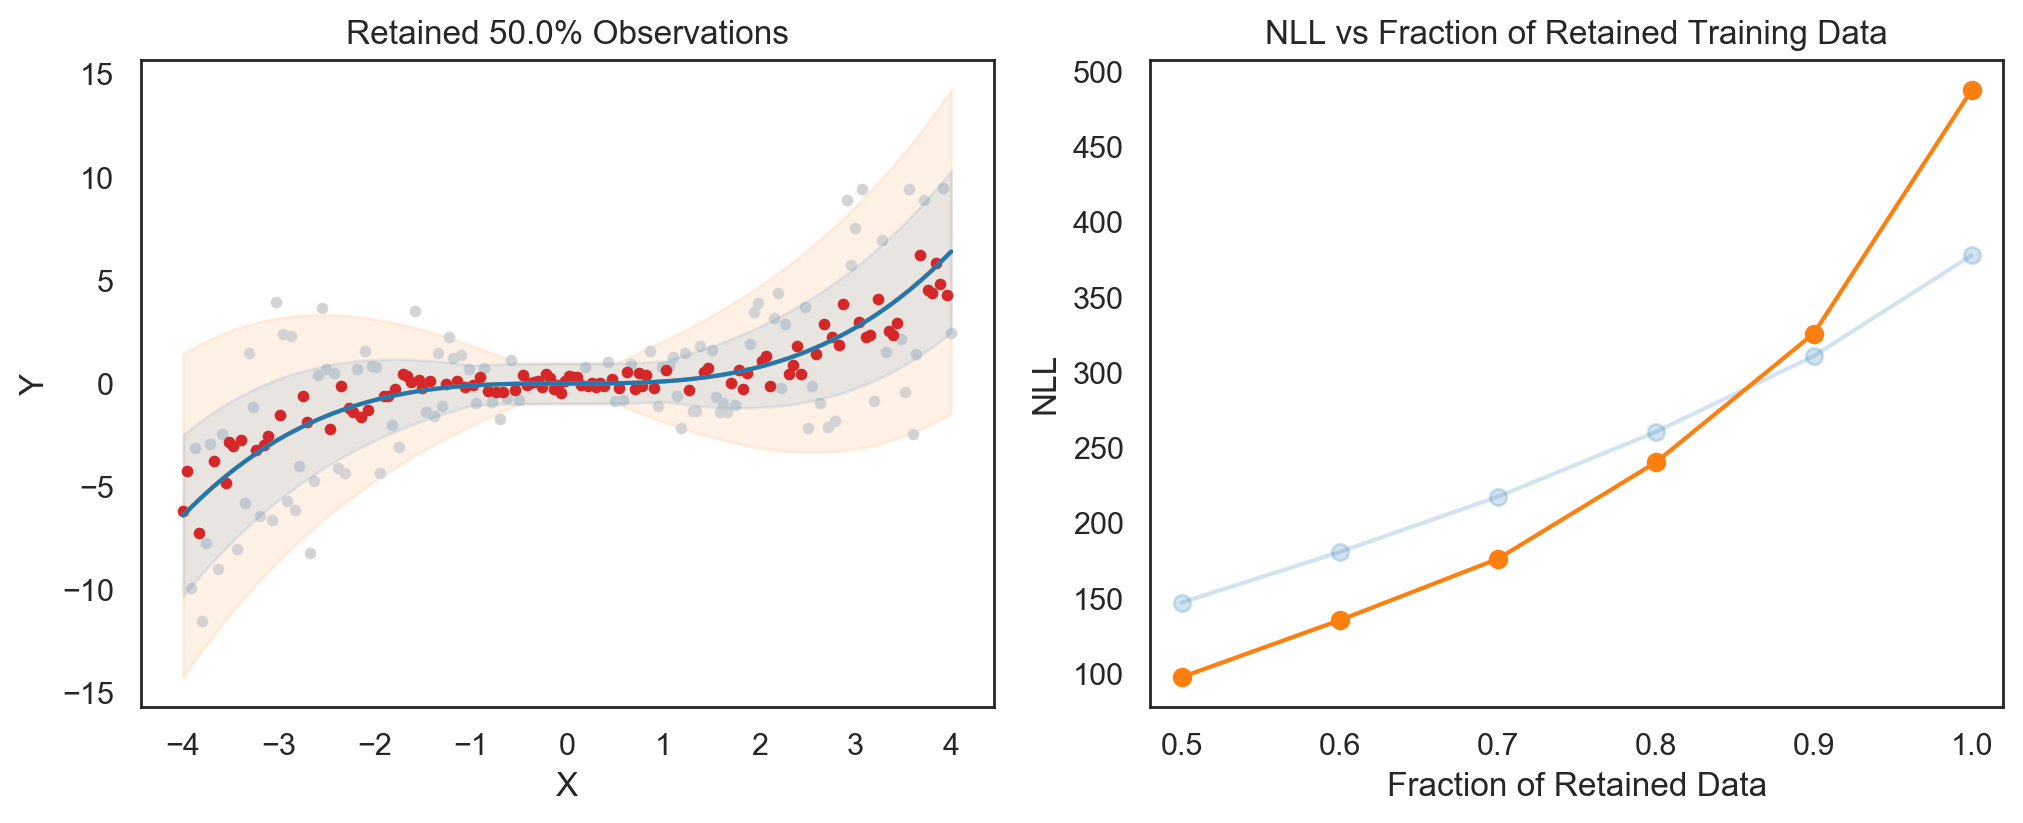

In [14]:
model = "heteroscedastic narrow unbiased"
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_frac(ppc[model], df, frac=0.5, seed=0)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

models = {name: func for name, func in ppc.items() if name in ["ideal", "heteroscedastic narrow unbiased"]}
for name, func in models.items():
    alpha = 1 if name == model else 0.2
    plot_nll_frac(ppc_func=func, df=df, label=name, legend=False, ax=ax[1], alpha=alpha)

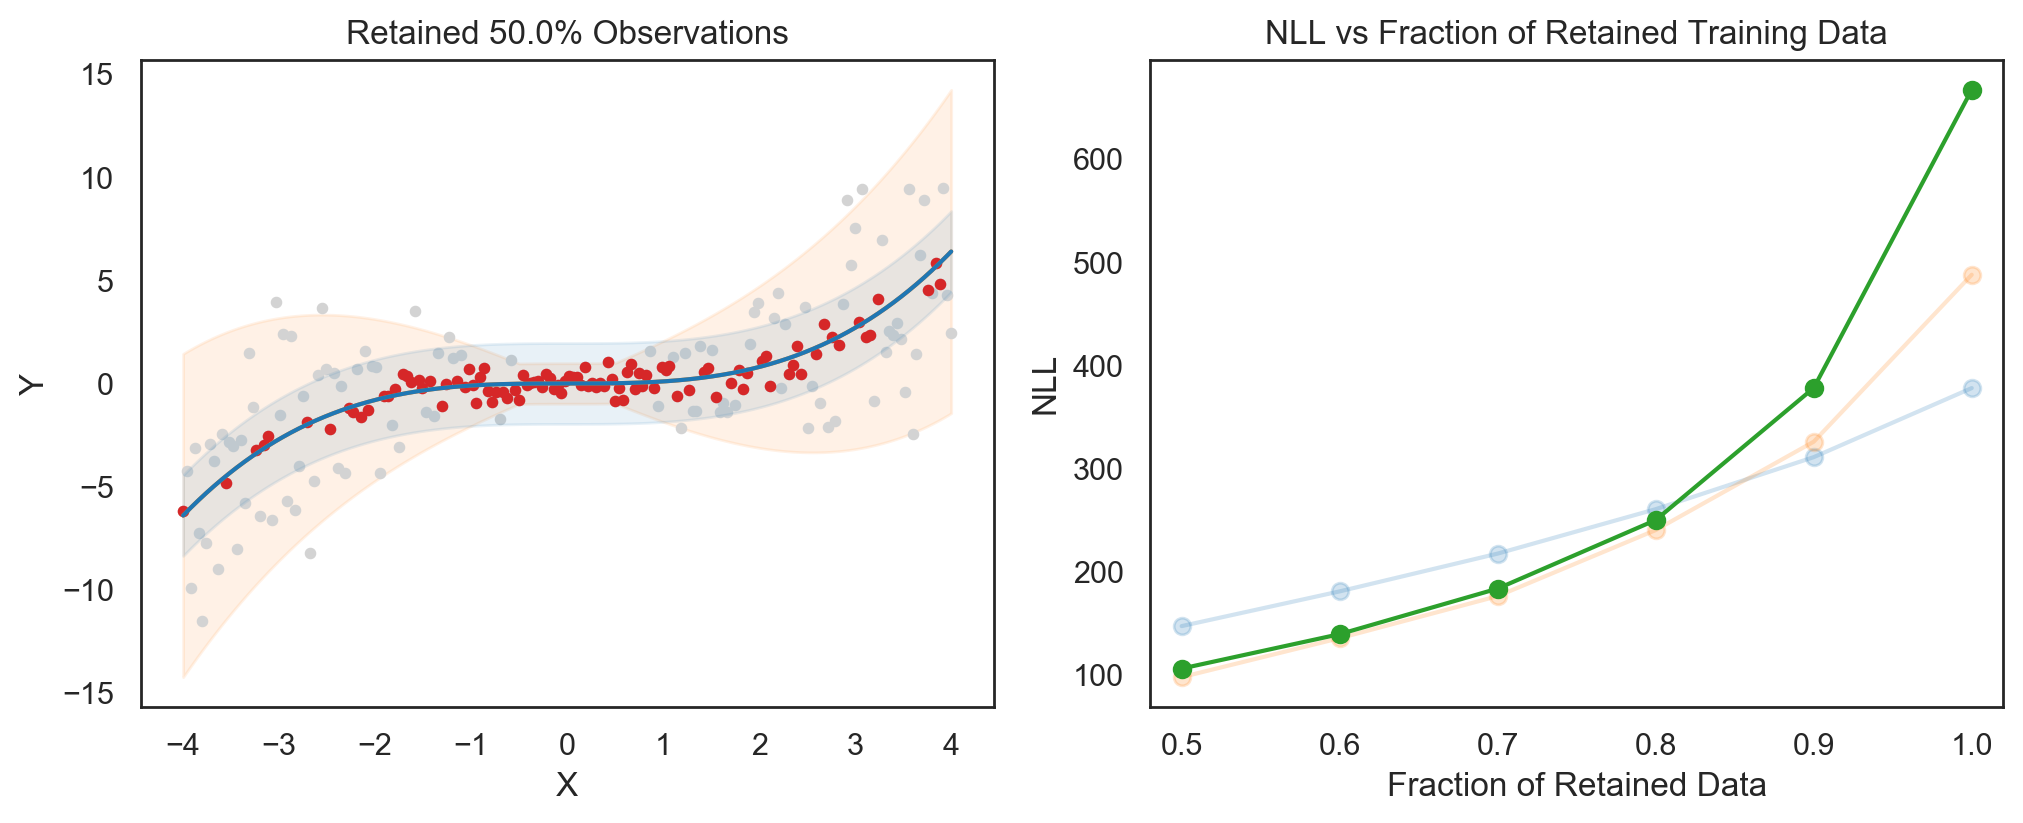

In [15]:
model = "homoscedastic unbiased"
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_true_function(heteroscedastic, df, legend=False, ax=ax[0])
plot_posterior_predictive(
    ppc[model], df, title=f"{model.title()} Posterior Predictive", legend=False, ax=ax[0]
)
df_retained = retain_frac(ppc[model], df, frac=0.5, seed=0)
ax[0].scatter(df_retained.x, df_retained.y, color="tab:red", s=10)
ax[0].set_title(f"Retained {df_retained.shape[0] / df.shape[0] * 100:.1f}% Observations")

for name, func in ppc.items():
    alpha = 1 if name == model else 0.2
    plot_nll_frac(ppc_func=func, df=df, label=name, legend=False, ax=ax[1], alpha=alpha)

### Misc

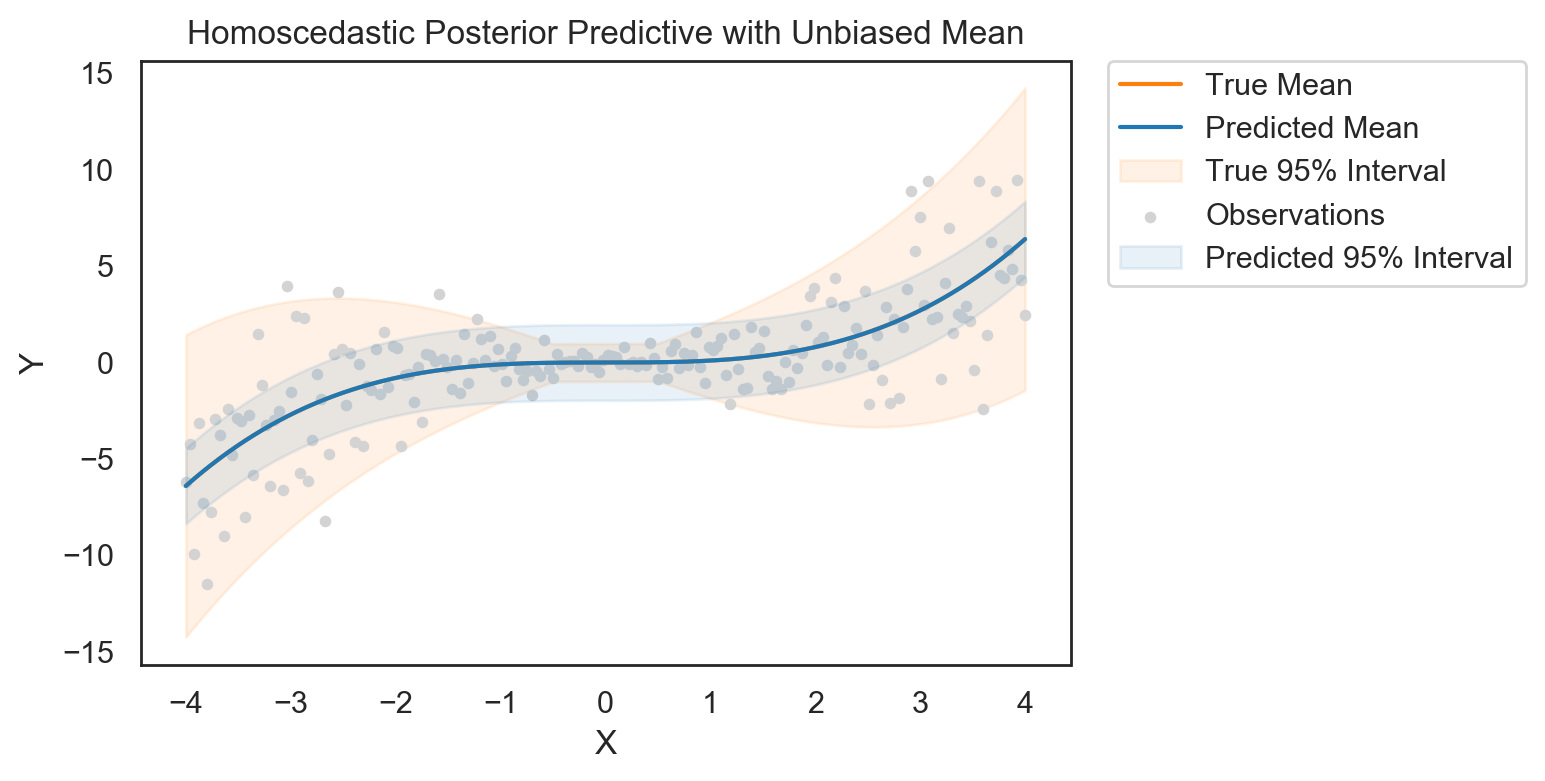

In [16]:
ppc = {}

ppc["homoscedastic unbiased"] = lambda x: scipy.stats.norm(loc=0.10 * x ** 3, scale=1)
plot_true_function(heteroscedastic, df)
plot_posterior_predictive(
    ppc["homoscedastic unbiased"], df, title="Homoscedastic Posterior Predictive with Unbiased Mean"
)

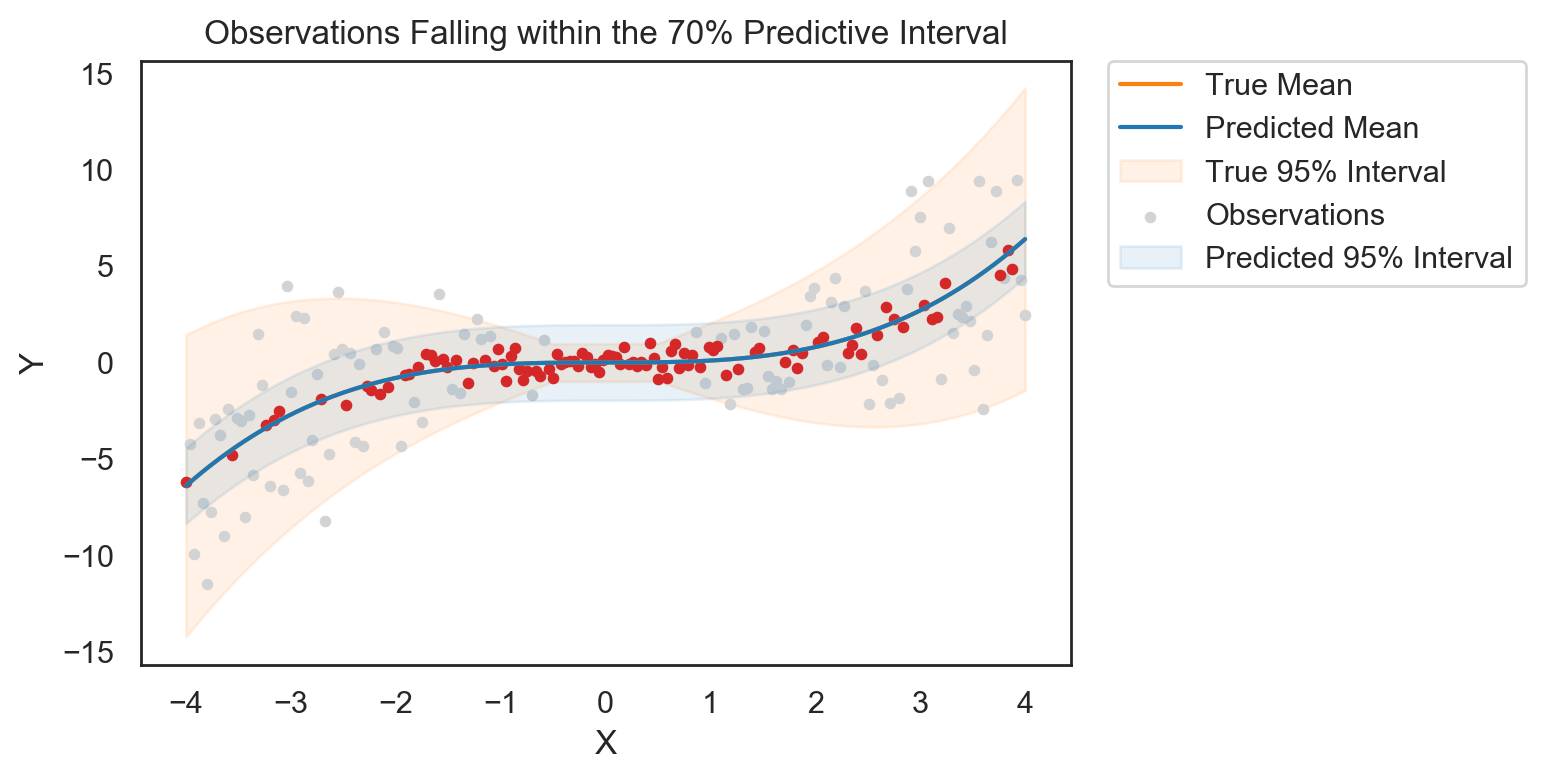

In [17]:
# Highlight observations falling within the 70% predictive interval
plot_true_function(heteroscedastic, df)
plot_posterior_predictive(
    ppc["homoscedastic unbiased"], df, title="Observations Falling within the 70% Predictive Interval"
)
df_retained = retain_interval(ppc["homoscedastic unbiased"], df, interval=0.7)
plt.scatter(df_retained.x, df_retained.y, color="tab:red", s=10);

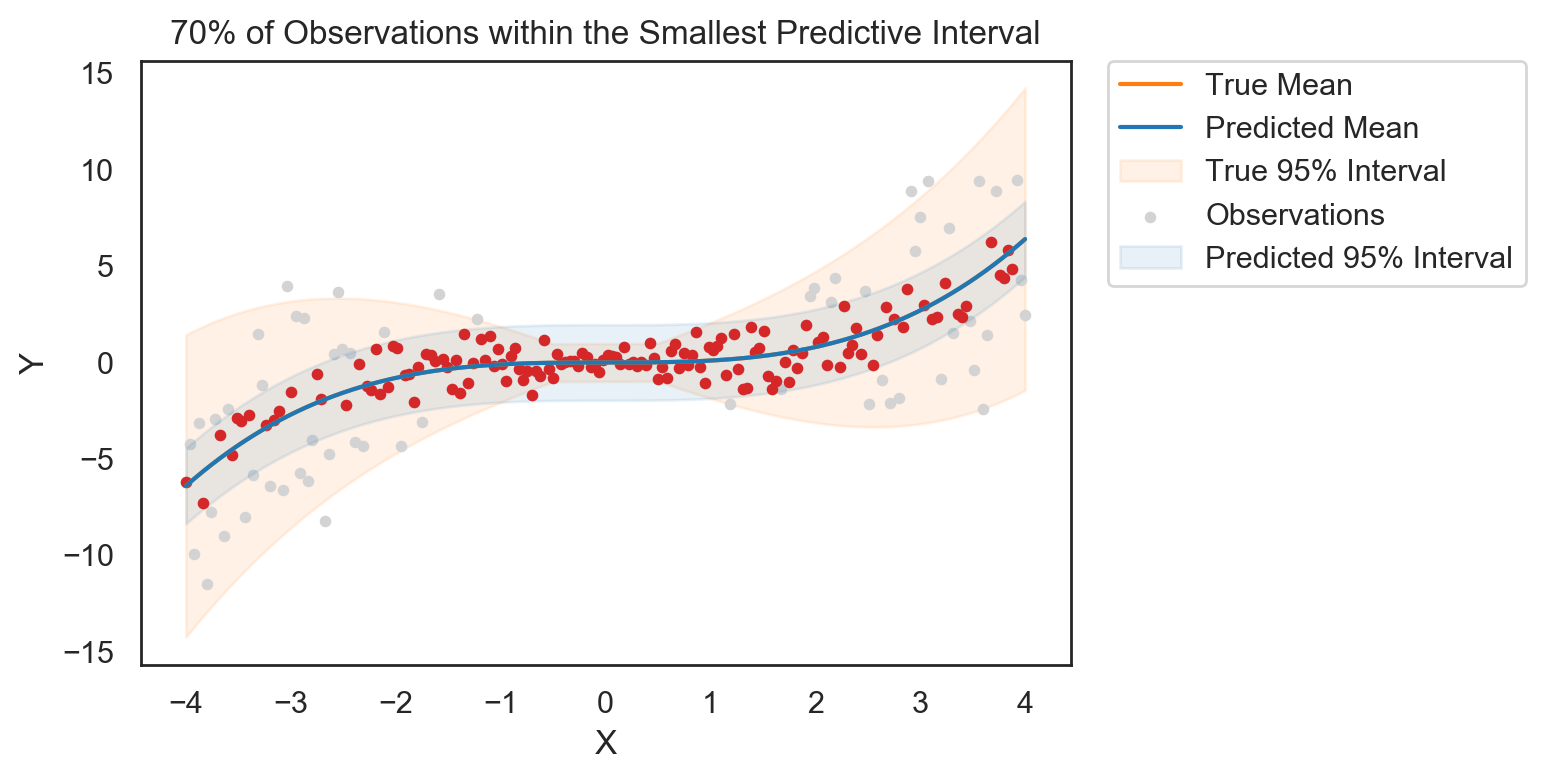

In [18]:
# Highlight 70% of observations falling within the smallest posterior predictive interval
plot_true_function(heteroscedastic, df)
plot_posterior_predictive(
    ppc["homoscedastic unbiased"], df, title="70% of Observations within the Smallest Predictive Interval"
)
df_retained = retain_frac(ppc["homoscedastic unbiased"], df, frac=0.7, seed=0)
plt.scatter(df_retained.x, df_retained.y, color="tab:red", s=10);

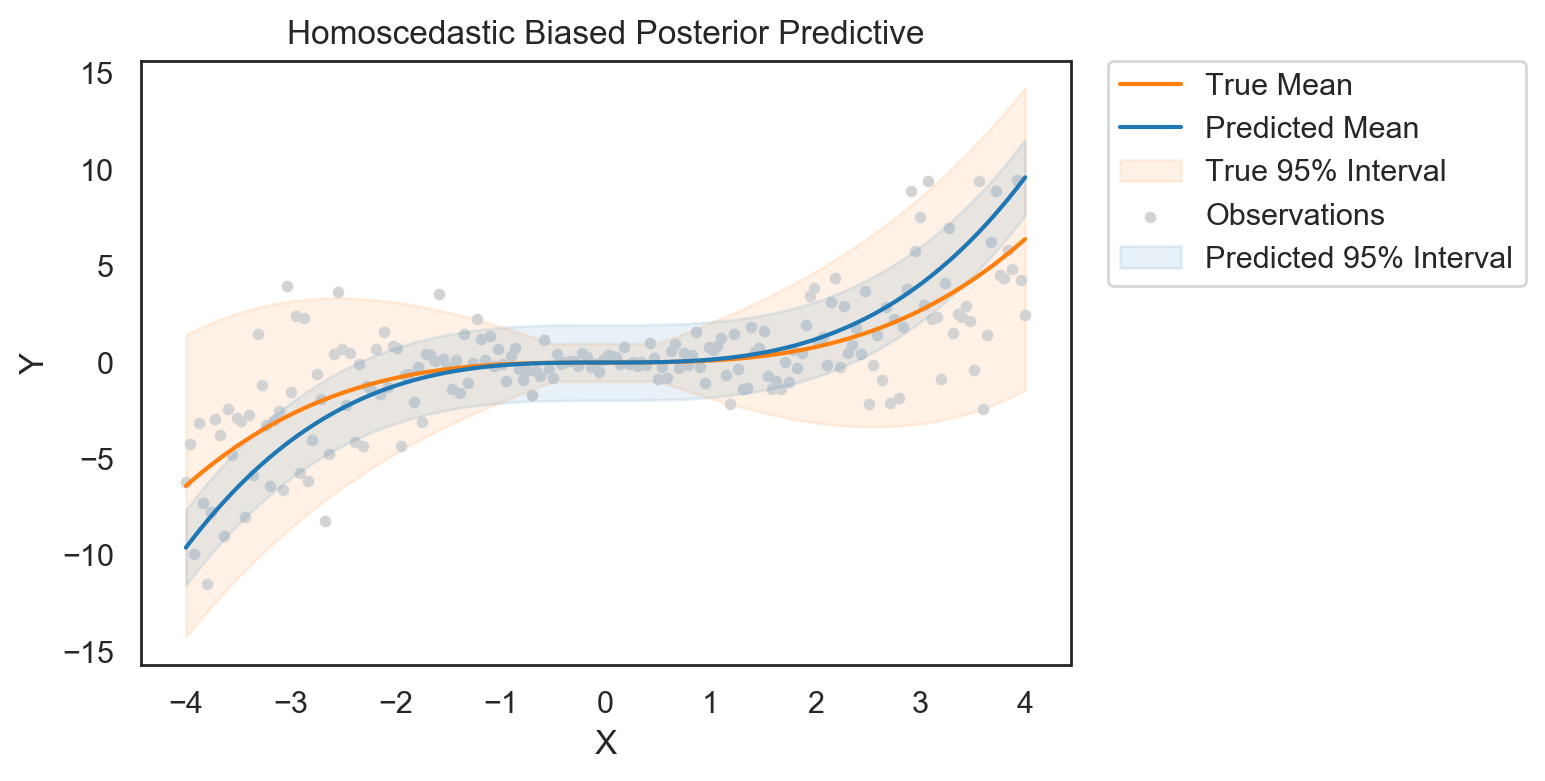

In [19]:
ppc["homoscedastic biased"] = lambda x: scipy.stats.norm(loc=0.15 * x ** 3, scale=1)
plot_true_function(heteroscedastic, df)
plot_posterior_predictive(ppc["homoscedastic biased"], df, title="Homoscedastic Biased Posterior Predictive")

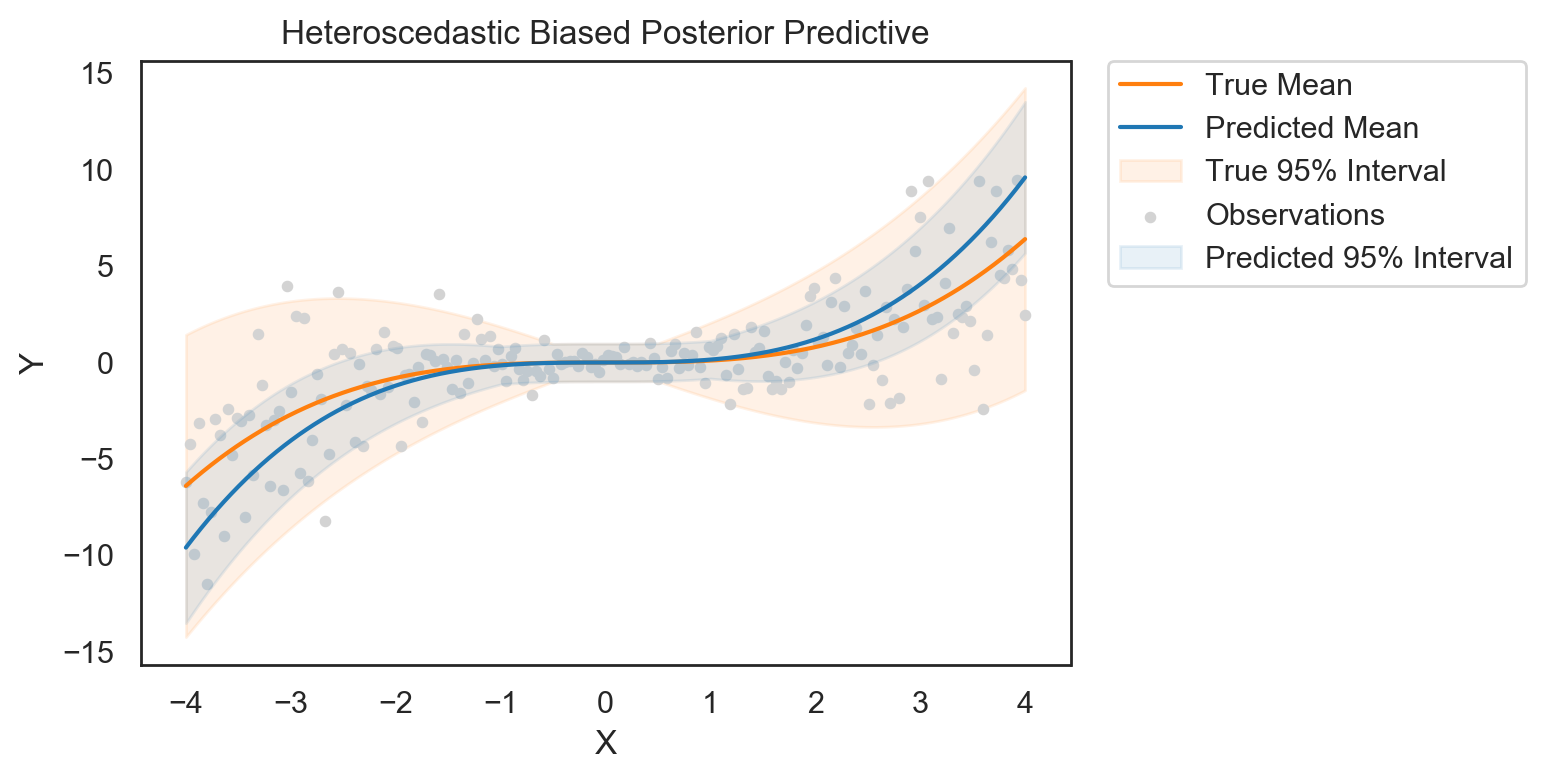

In [20]:
ppc["heteroscedastic narrow"] = lambda x: heteroscedastic_base(x, base_std=0.5, bias=0.05)

plot_true_function(heteroscedastic, df)
plot_posterior_predictive(
    ppc["heteroscedastic narrow"], df, title="Heteroscedastic Biased Posterior Predictive"
)

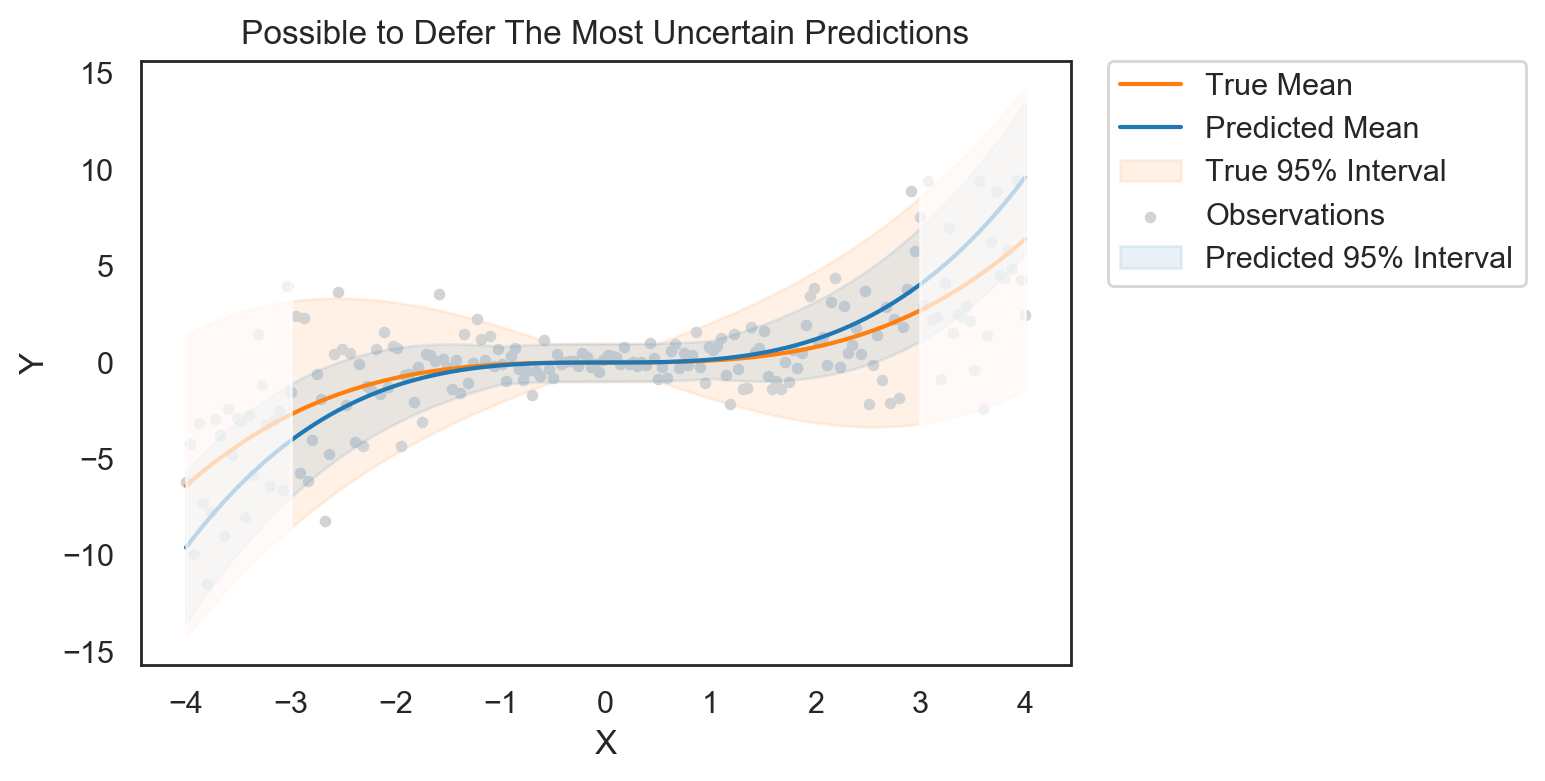

In [21]:
plot_true_function(heteroscedastic, df)
plot_posterior_predictive(
    ppc["heteroscedastic narrow"], df, title="Possible to Defer The Most Uncertain Predictions"
)
plt.axvspan(-4, -3, ymin=0.01, ymax=0.99, alpha=0.7, color="white", zorder=3)
plt.axvspan(3, 4, ymin=0.01, ymax=0.99, alpha=0.7, color="white", zorder=3);

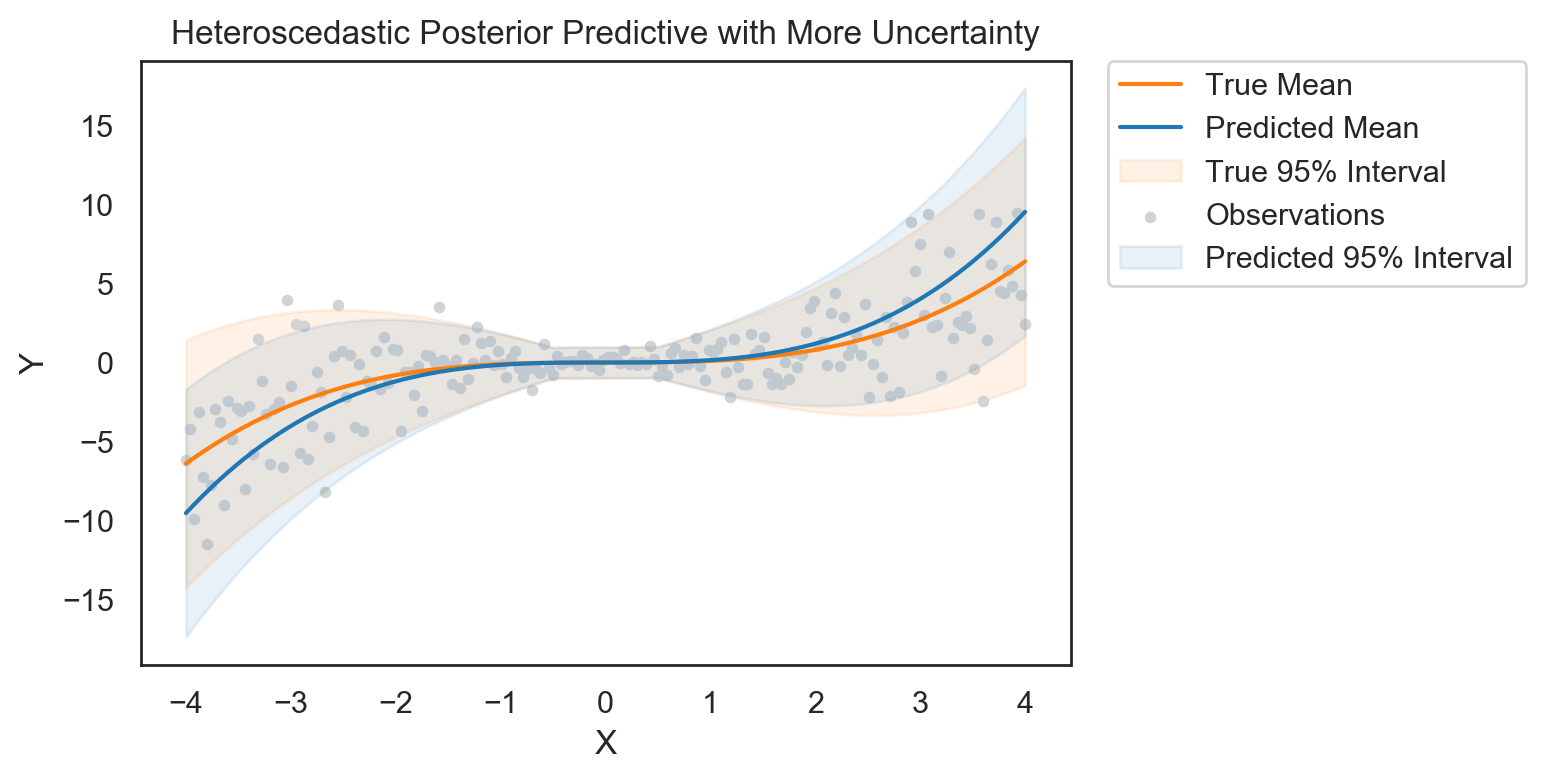

In [22]:
ppc["heteroscedastic wide"] = lambda x: heteroscedastic_base(x, base_std=1.0, bias=0.049)

plot_true_function(heteroscedastic, df)
plot_posterior_predictive(
    ppc["heteroscedastic wide"], df, title="Heteroscedastic Posterior Predictive with More Uncertainty"
)

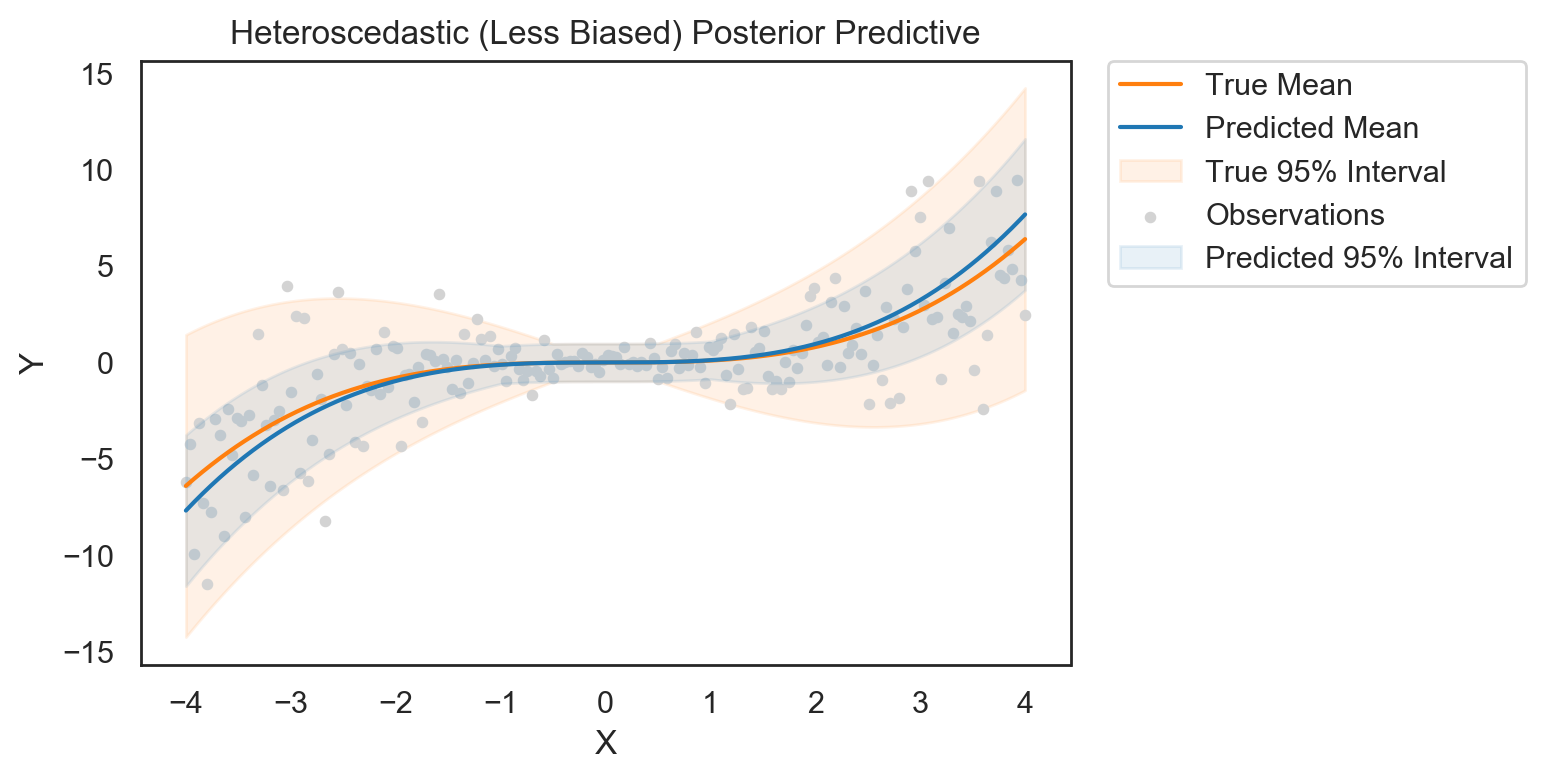

In [23]:
ppc["heteroscedastic less biased"] = lambda x: heteroscedastic_base(x, base_std=0.5, bias=0.02)

plot_true_function(heteroscedastic, df)
plot_posterior_predictive(
    ppc["heteroscedastic less biased"], df, title="Heteroscedastic (Less Biased) Posterior Predictive"
)

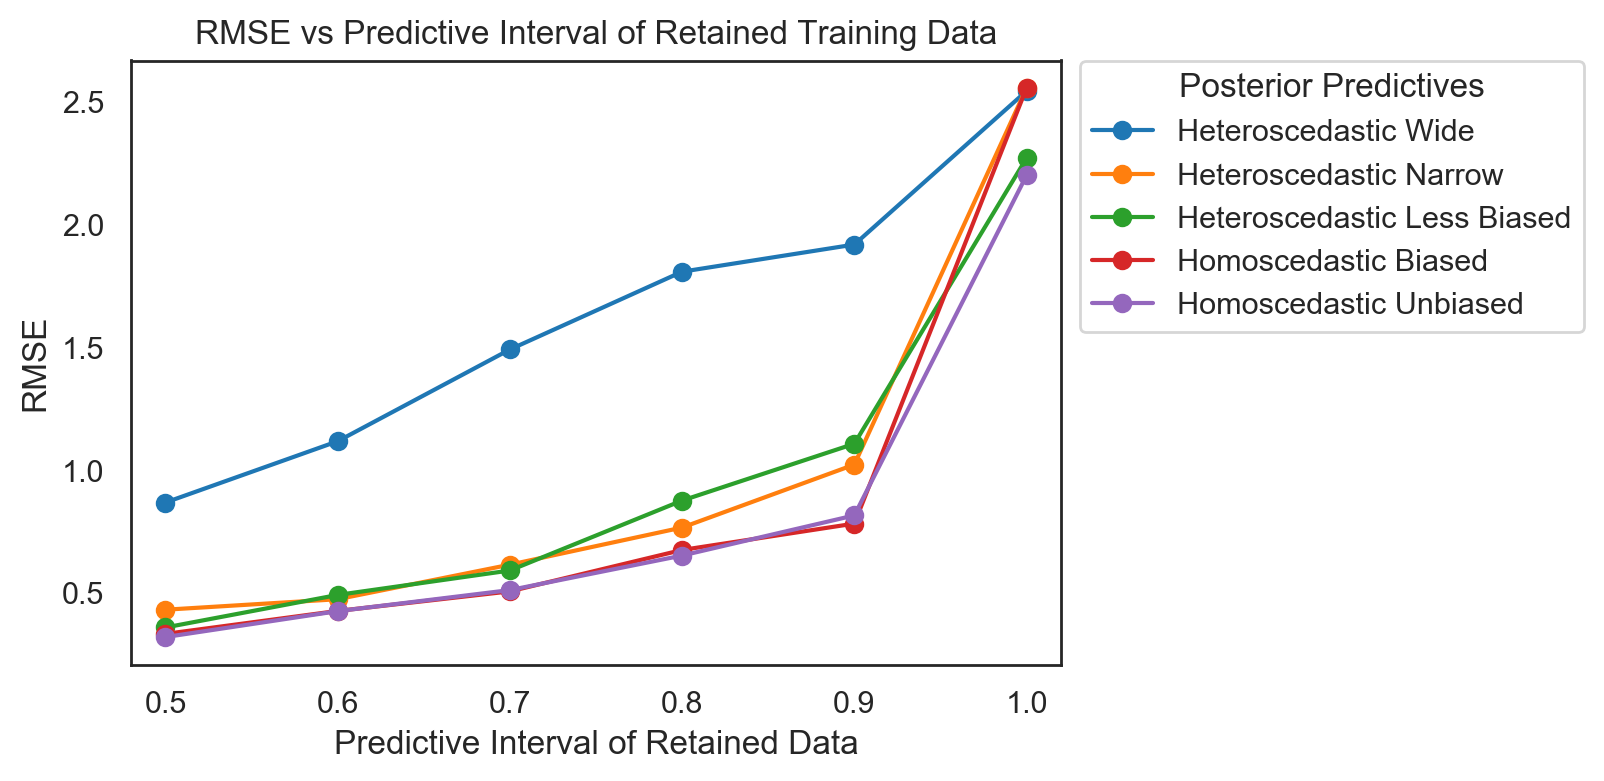

In [24]:
models = [
    "heteroscedastic wide",
    "heteroscedastic narrow",
    "heteroscedastic less biased",
    "homoscedastic biased",
    "homoscedastic unbiased",
]
for model in models:
    plot_rmse_interval(ppc_func=ppc[model], df=df, label=model)

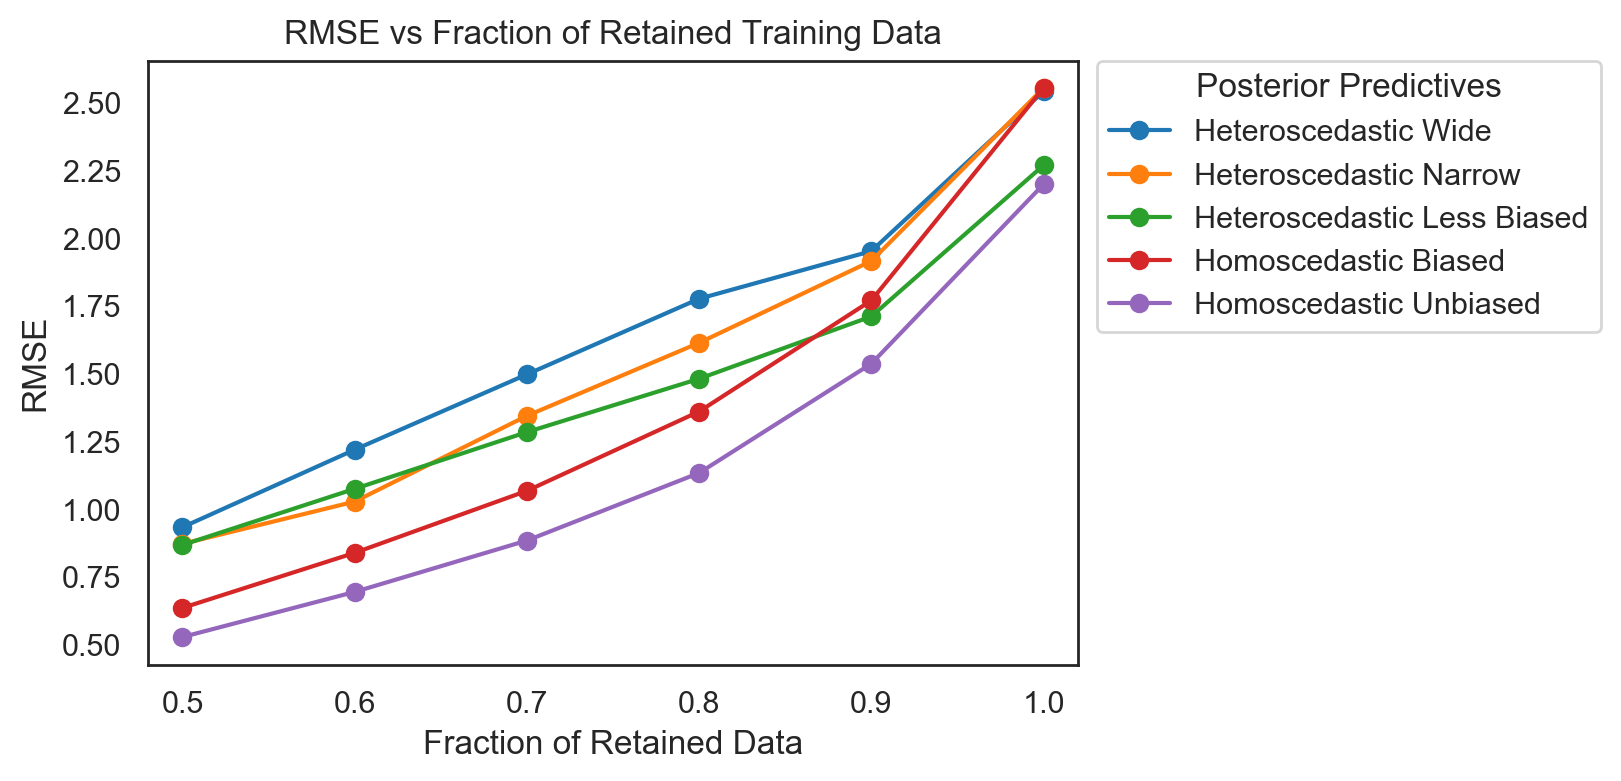

In [25]:
for model in models:
    plot_rmse_frac(ppc_func=ppc[model], df=df, label=model)

---

<img src='./images/gals-retained-metric.png'>

## Case 2: Good aleatoric, varying epistemic uncertainty 

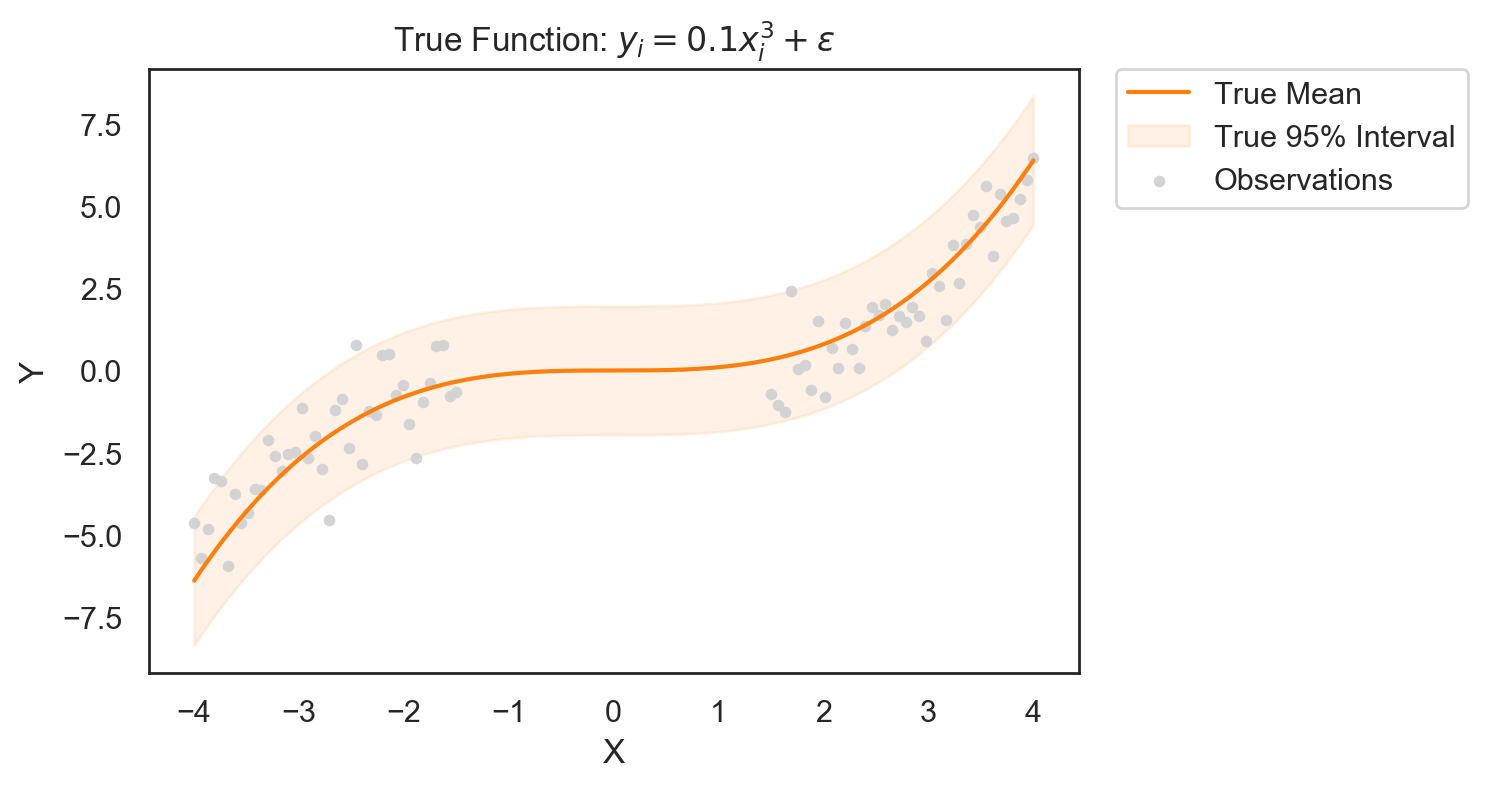

In [26]:
# Define the true function and generate observations
homoscedastic = lambda x: scipy.stats.norm(loc=0.1 * x ** 3, scale=1.0)

train_points = [
    {"n_points": 40, "xlim": [-4, -1.5]},
    {"n_points": 40, "xlim": [1.5, 4]},
]
test_points = [
    {"n_points": 120, "xlim": [-4, 4]},
]
df = generate_data(homoscedastic, points=train_points, seed=0)
df_test = generate_data(homoscedastic, points=test_points, seed=1)

# Plot the data
plot_true_function(homoscedastic, df, title=fr"True Function: $y_i = 0.1x_i^3 + \varepsilon$")

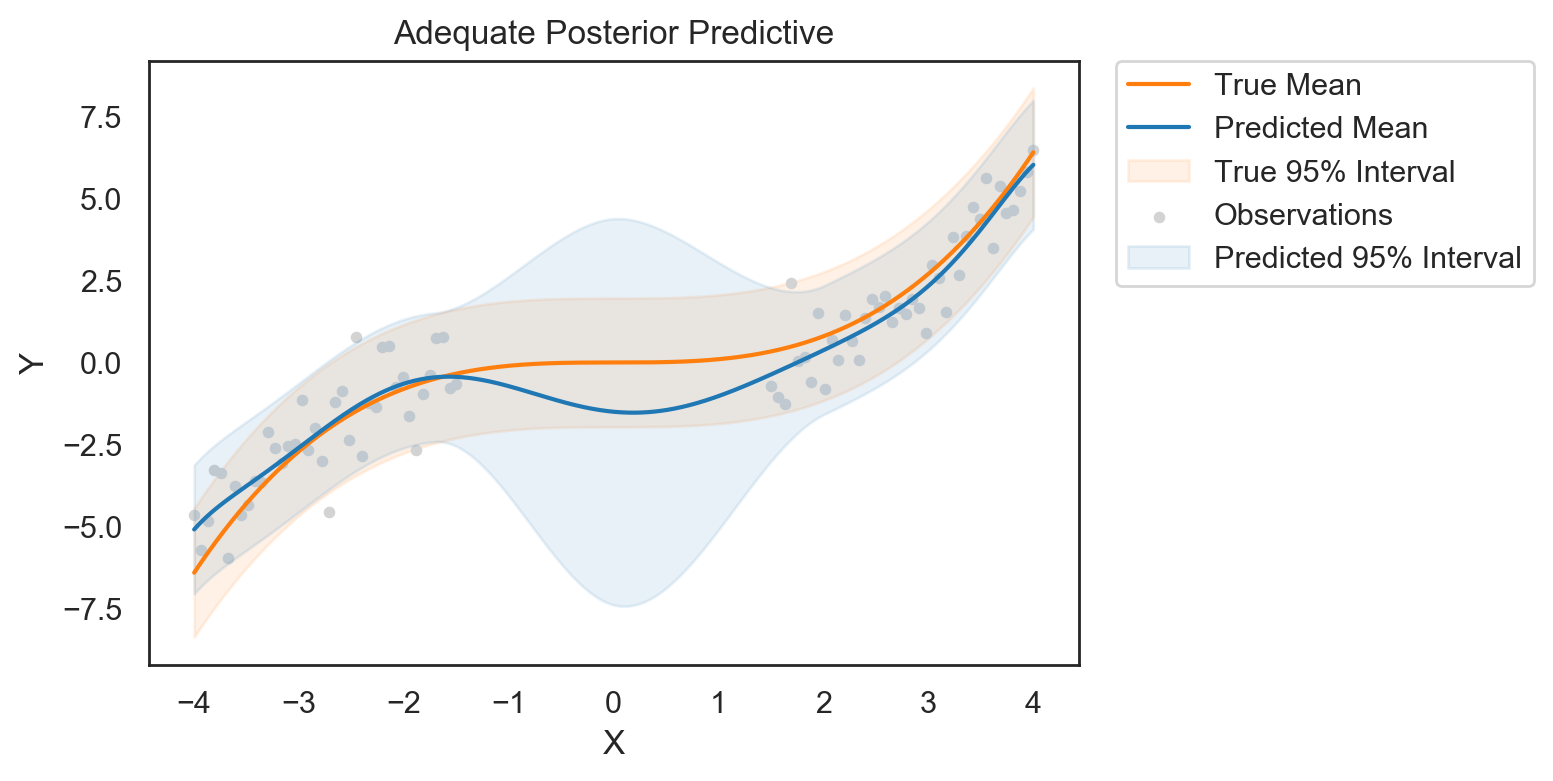

In [27]:
ppc["adequate uncertainty"] = FakePosterior(
    df.x, df.y, degree=8, aleatoric=1.0, epistemic=2.0, gap=[-1.7, 2.0]
)

plot_true_function(homoscedastic, df)
plot_posterior_predictive(ppc["adequate uncertainty"], df, title="Adequate Posterior Predictive")

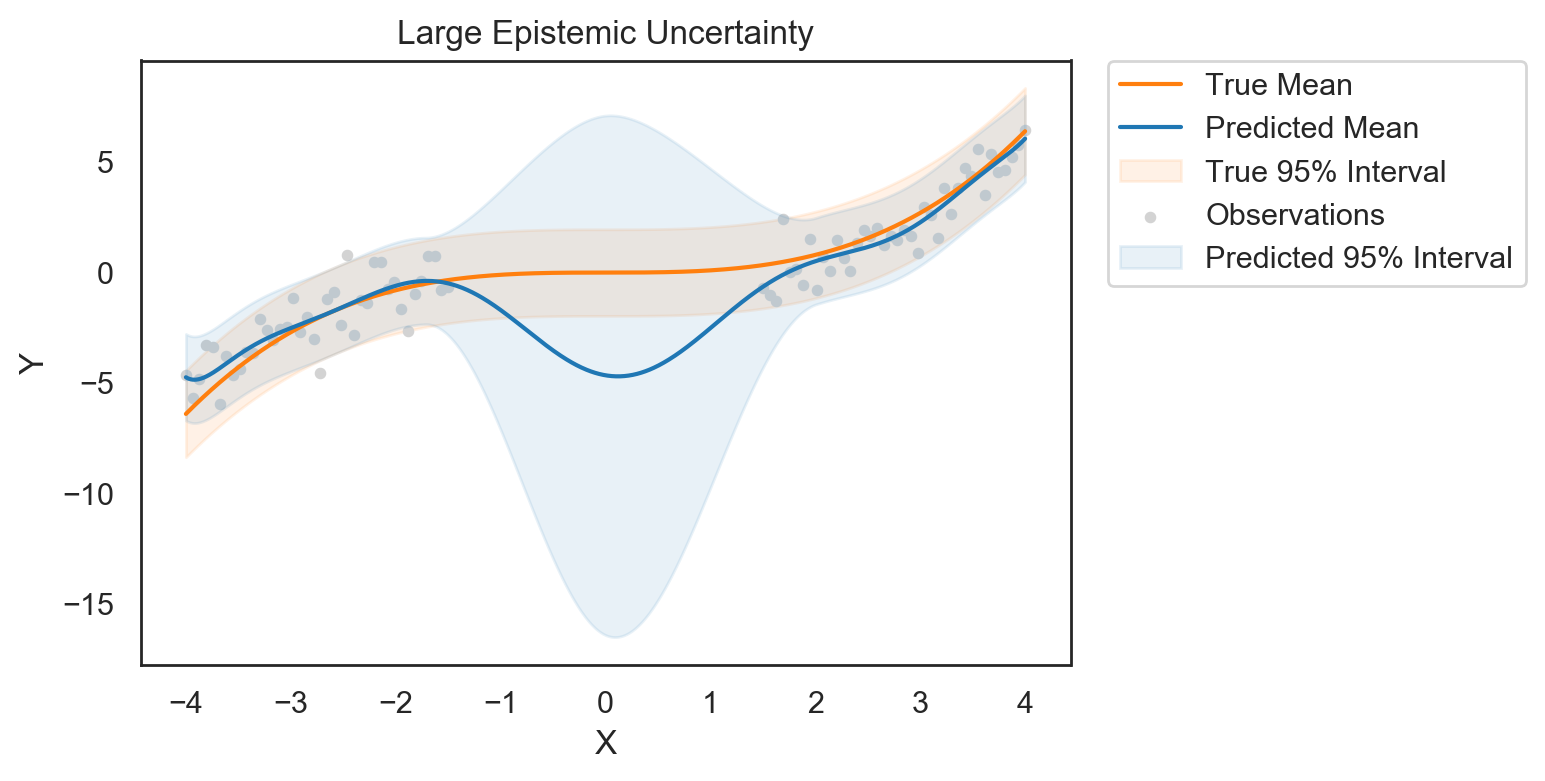

In [28]:
ppc["large epistemic"] = FakePosterior(df.x, df.y, degree=10, aleatoric=1.0, epistemic=5.0, gap=[-1.7, 2.0])

plot_true_function(homoscedastic, df)
plot_posterior_predictive(ppc["large epistemic"], df, title="Large Epistemic Uncertainty")

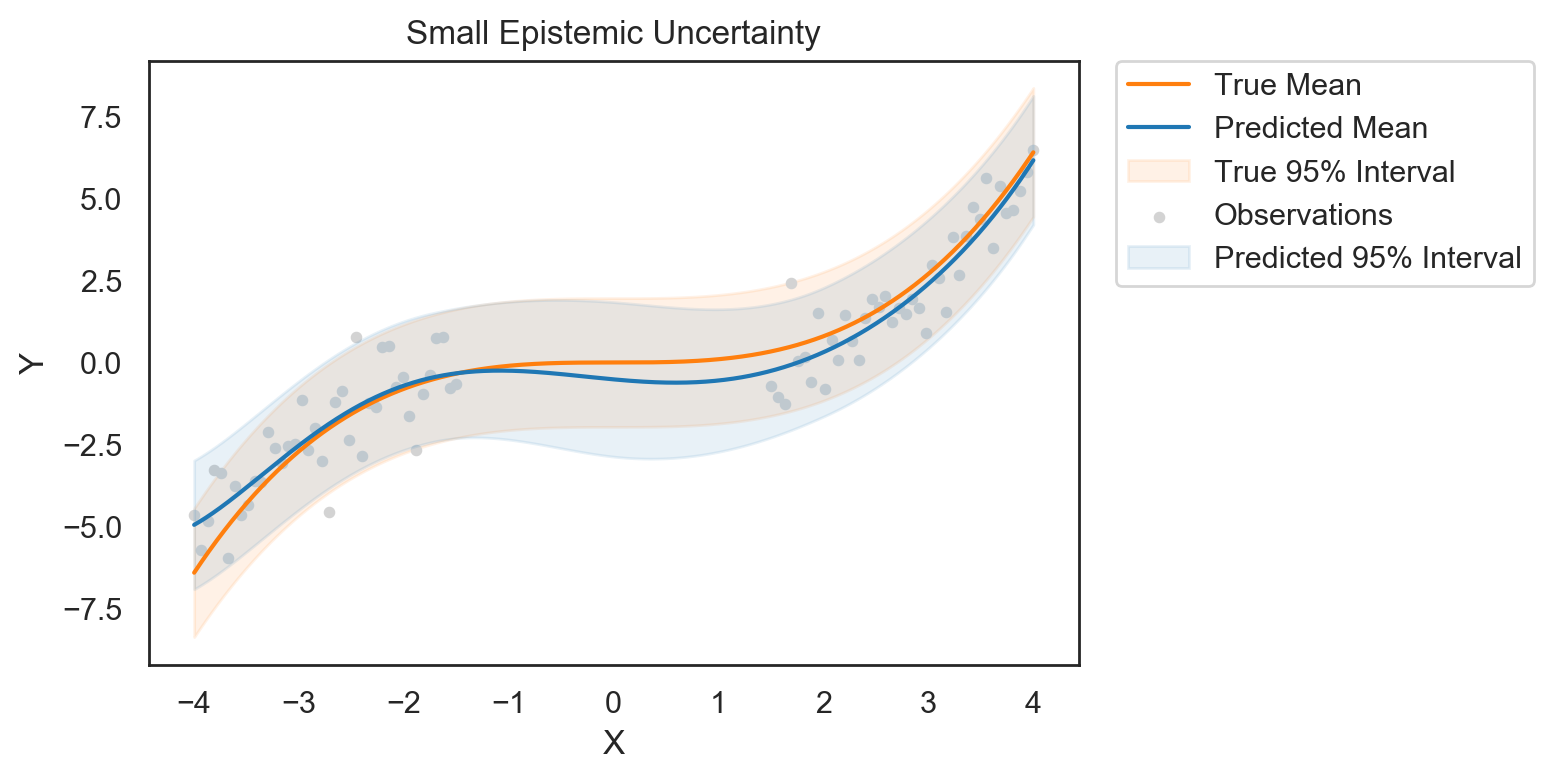

In [29]:
ppc["small epistemic"] = FakePosterior(df.x, df.y, degree=6, aleatoric=1.0, epistemic=0.2, gap=[-1.7, 2.0])

plot_true_function(homoscedastic, df)
plot_posterior_predictive(ppc["small epistemic"], df, title="Small Epistemic Uncertainty")

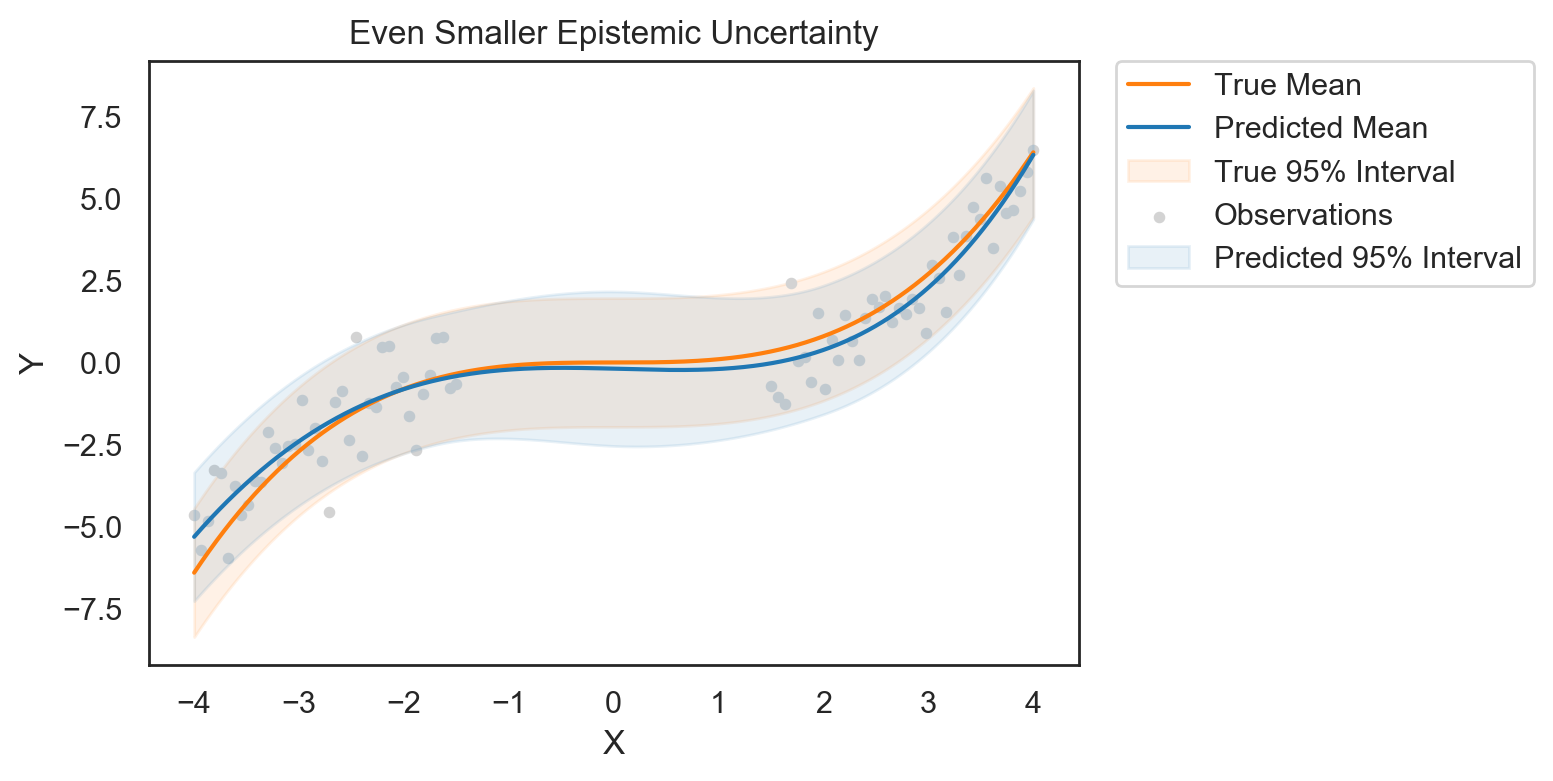

In [30]:
ppc["even smaller epistemic"] = FakePosterior(
    df.x, df.y, degree=4, aleatoric=1.0, epistemic=0.2, gap=[-1.7, 2.0]
)

plot_true_function(homoscedastic, df)
plot_posterior_predictive(ppc["even smaller epistemic"], df, title="Even Smaller Epistemic Uncertainty")

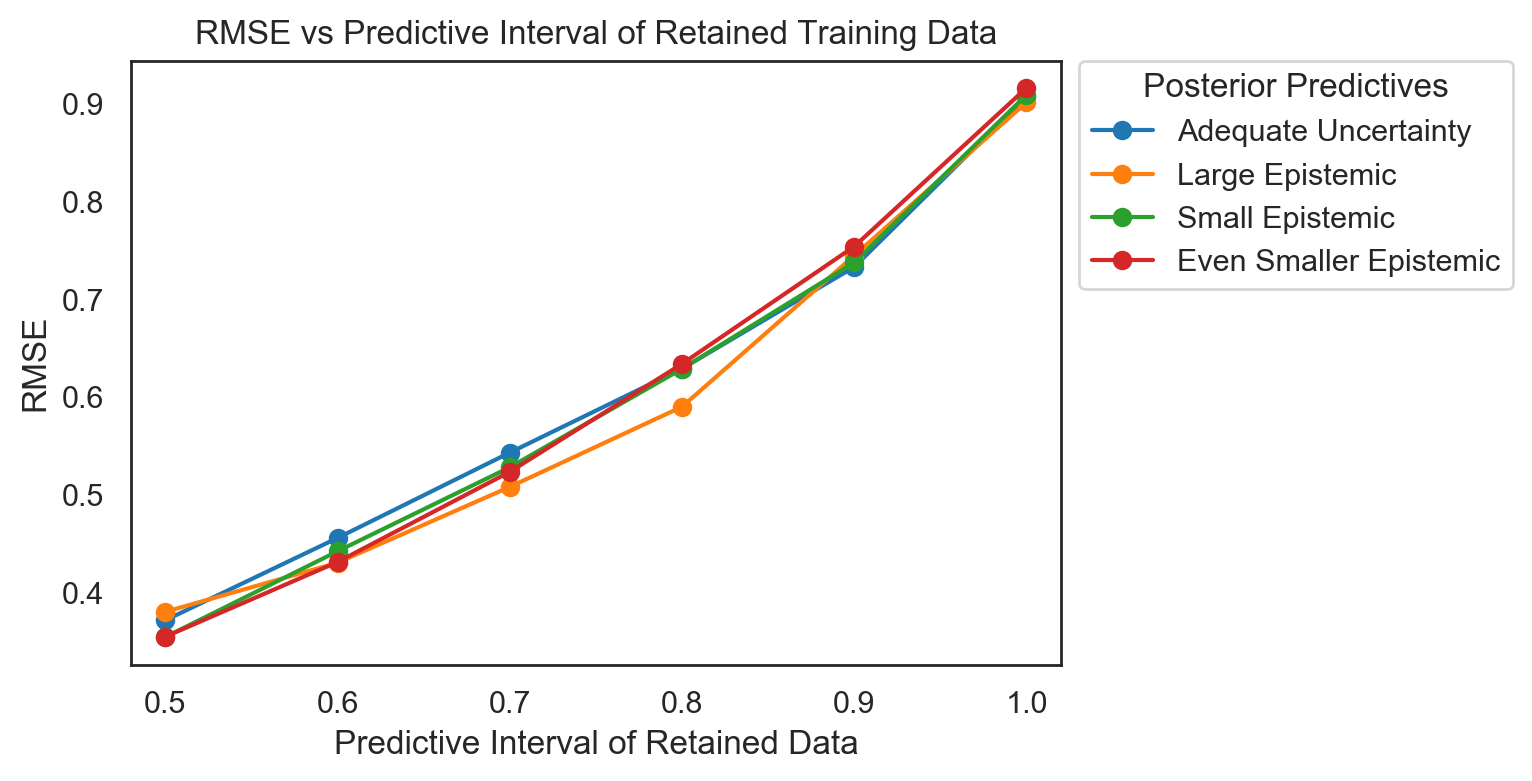

In [31]:
models = ["adequate uncertainty", "large epistemic", "small epistemic", "even smaller epistemic"]

for model in models:
    plot_rmse_interval(ppc_func=ppc[model], df=df, label=model)

In [32]:
# TODO: Implement CDF of a fake posterior
# for model in models:
#     plot_rmse_frac(ppc_func=ppc[model], df=df, label=model)

---

# Next steps

- Further investigation into these plots and metrics
    - Construct additional toy examples of good and bad Bayesian models to understand if the plot can distinguish between them
    - Apply the calibration algorithm and see if the potentially positive effects of calibration are reflected in the plots
    - Try other metrics in addition to RMSE, such as negative log-likelihood, etc.
    - Understand how confidence intervals for each metric could be calculated
    - Produce similar diagnostic plots for more realistic datasets, e.g. UCI datasets
- Calibration
    - Understand how we could apply the fairness criterion for informed (not average) calibration
    - Research possible ways to calibrate without ruining epistemic uncertainty
    - See if it is possible to automatically detect where (in which regions or groups) the model is miscalibrated
- Application
    - Pick a couple of candidate tasks in active learning, RL or Bayesian optimization
    - Come up with ways to more comprehensively evaluate models with uncertainty on those tasks